<a href="https://colab.research.google.com/github/namhawon/2024_Study02/blob/main/08_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%ED%9A%8C%EA%B7%80_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **대학 주요 정보 데이터셋 신입생 충원율 선형 회귀 모델**

In [ ]:
import pandas as pd

univ_df = pd.read_excel("대학주요정보.xlsx")

In [ ]:
univ_df.head(5)

,No,university_name,campus_name,school_type,school_category,establishment_type,region_name,undergrad_admission_quota_2023,undergrad_graduates_2023,full_time_faculty_2023,...,international_students_2023,students_per_faculty_2023,faculty_ratio_based_on_quota_2023,faculty_ratio_based_on_enrollment_2023,faculty_teaching_ratio_2023,scholarship_per_student_2023,annual_tuition_2024,education_cost_per_student_2023,dorm_capacity_rate_2023,books_per_student_2023
0,1,ICT폴리텍대학,본교,전문대학,기능대학,사립,경기,160,114,15,...,1,21.33,93.75,100.00,69.0,2194708.2,2500.0,30475.9,86.7,36.0
1,2,가야대학교(고령),제2캠퍼스,대학,대학교,사립,경북,0,0,0,...,0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,3,가야대학교(김해),본교,대학,대학교,사립,경남,460,523,76,...,17,30.16,71.03,87.36,69.4,3774750.9,6867.3,13360.3,34.5,123.1
3,4,가천대학교,본교,대학,대학교,사립,경기,4131,3846,938,...,2743,19.99,103.76,82.43,61.2,3565844.8,8342.9,15810.9,14.8,54.2
4,5,가톨릭관동대학교,본교,대학,대학교,사립,강원,1644,1768,389,...,83,22.55,94.19,122.33,78.2,3715715.0,7206.1,13167.2,37.5,102.0


In [ ]:
univ_df.columns

Index(['No', 'university_name', 'campus_name', 'school_type',
       'school_category', 'establishment_type', 'region_name',
       'undergrad_admission_quota_2023', 'undergrad_graduates_2023',
       'full_time_faculty_2023', 'undergrad_students_2023',
       'freshman_competition_rate_2023', 'freshman_enrollment_rate_2023',
       'employment_rate_2023', 'international_students_2023',
       'students_per_faculty_2023', 'faculty_ratio_based_on_quota_2023',
       'faculty_ratio_based_on_enrollment_2023', 'faculty_teaching_ratio_2023',
       'scholarship_per_student_2023', 'annual_tuition_2024',
       'education_cost_per_student_2023', 'dorm_capacity_rate_2023',
       'books_per_student_2023'],
      dtype='object')

## 한글 컬럼명과 영어 컬럼명

학교명: university_name

본분교명: campus_name

학교종류: school_type

학교유형: school_category

설립유형: establishment_type

지역명: region_name

입학정원(학부)(2023,명): undergrad_admission_quota_2023

졸업생수(학부)(2023,명): undergrad_graduates_2023

전임교원수(학부+대학원)(2023,명): full_time_faculty_2023

재학생(학부)(2023,명): undergrad_students_2023

신입생 경쟁률(학부)(2023,:1): freshman_competition_rate_2023

신입생 충원율(학부)(2023,%) : freshman_enrollment_rate_2023

취업률(학부)(2023,%) : employment_rate_2023

외국인 학생 수(학부)(2023,명) : international_students_2023

전임교원 1인당 학생 수(학생정원기준)(학부+대학원)(2023,명) : students_per_faculty_2023

전임교원 확보율(학생정원기준)(학부+대학원)(2023,%) : faculty_ratio_based_on_quota_2023

전임 교원 확보율(재학생 기준)(학부+대학원)(2023,%) : faculty_ratio_based_on_enrollment_2023

전임교원 강의 담당 비율(학부)(2023,%) : faculty_teaching_ratio_2023

학생 1인당 연간 장학금(학부)(2023,원) : scholarship_per_student_2023

연평균 등록금(학부)(2024,천원) : annual_tuition_2024

학생 1인당 교육비(학부+대학원)(2023,천원) : education_cost_per_student_2023

기숙사 수용율(학부+대학원)(2023,%) : dorm_capacity_rate_2023

학생 1인당 도서 자료 수(학부+대학원)(2023,권) : books_per_student_2023

## Numerical Data의 전처리

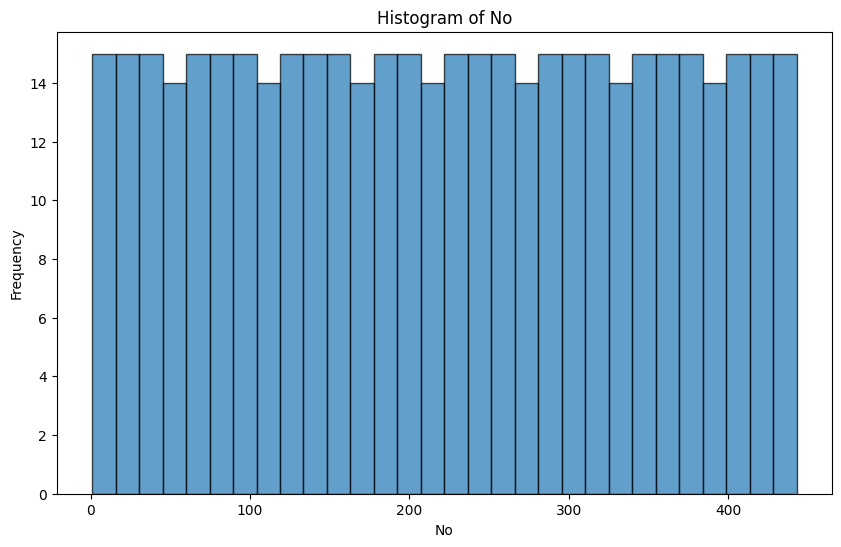

'No' column outliers:
No outliers found.



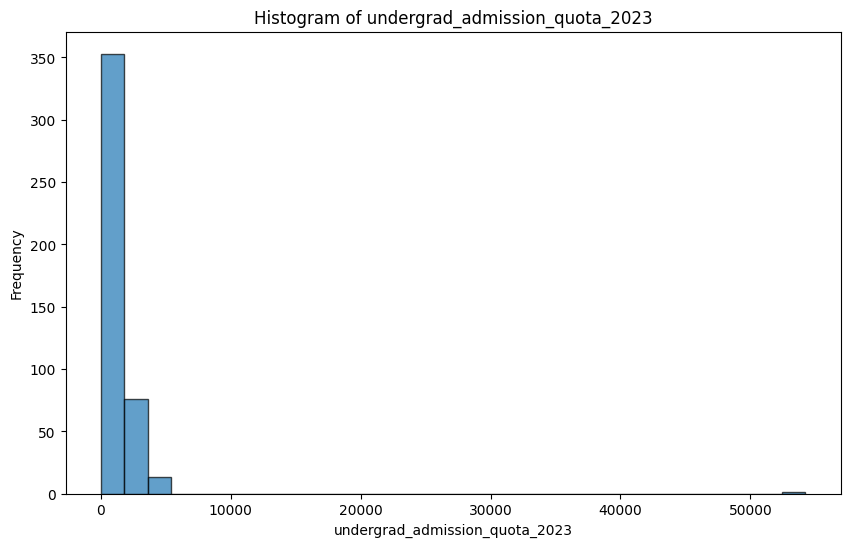

'undergrad_admission_quota_2023' column outliers:
    university_name  undergrad_admission_quota_2023
3             가천대학교                            4131
40            경북대학교                            4659
44          경상국립대학교                            4260
52            경희대학교                            4830
54            계명대학교                            4620
57            고려대학교                            3884
113           대구대학교                            3850
142           동아대학교                            4058
172           부산대학교                            4291
259           영남대학교                            4587
310           전북대학교                            3848
322           조선대학교                            4367
366       한국방송통신대학교                           54240



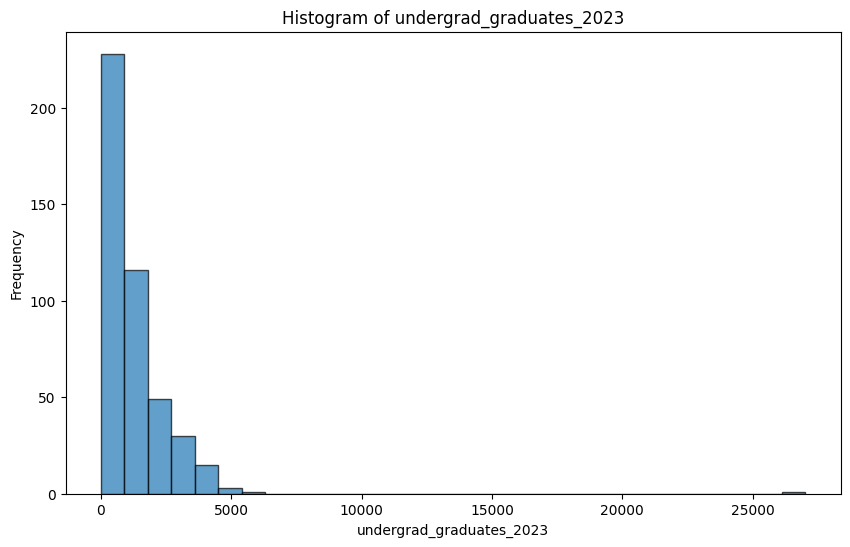

'undergrad_graduates_2023' column outliers:
    university_name  undergrad_graduates_2023
3             가천대학교                      3846
40            경북대학교                      4738
52            경희대학교                      6247
54            계명대학교                      4829
57            고려대학교                      4391
113           대구대학교                      3857
142           동아대학교                      4178
172           부산대학교                      4278
198        서울사이버대학교                      4157
214          성균관대학교                      4122
255           연세대학교                      4030
259           영남대학교                      4857
300           인하대학교                      3911
310           전북대학교                      4070
322           조선대학교                      4167
325           중앙대학교                      4144
366       한국방송통신대학교                     27027
376        한국외국어대학교                      3889
427        한양사이버대학교                      4077



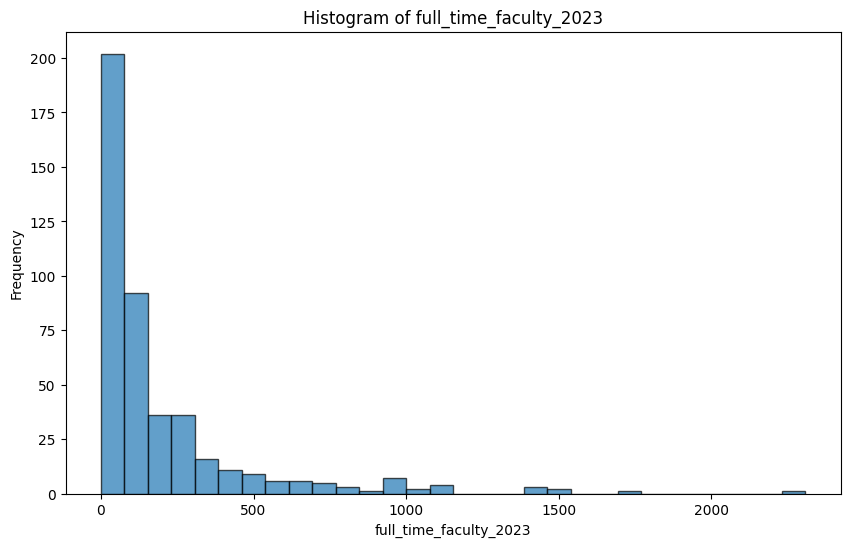

'full_time_faculty_2023' column outliers:
    university_name  full_time_faculty_2023
3             가천대학교                     938
7            가톨릭대학교                     981
17            강원대학교                     808
20            건국대학교                     623
40            경북대학교                    1396
44          경상국립대학교                    1027
52            경희대학교                    1396
54            계명대학교                     844
57            고려대학교                    1525
75          국립공주대학교                     569
80          국립부경대학교                     615
87            국민대학교                     663
108        대구가톨릭대학교                     570
113           대구대학교                     546
133           동국대학교                     681
142           동아대학교                     779
151           동의대학교                     556
172           부산대학교                    1425
196           서울대학교                    2308
214          성균관대학교                    1520
220           세종대학교               

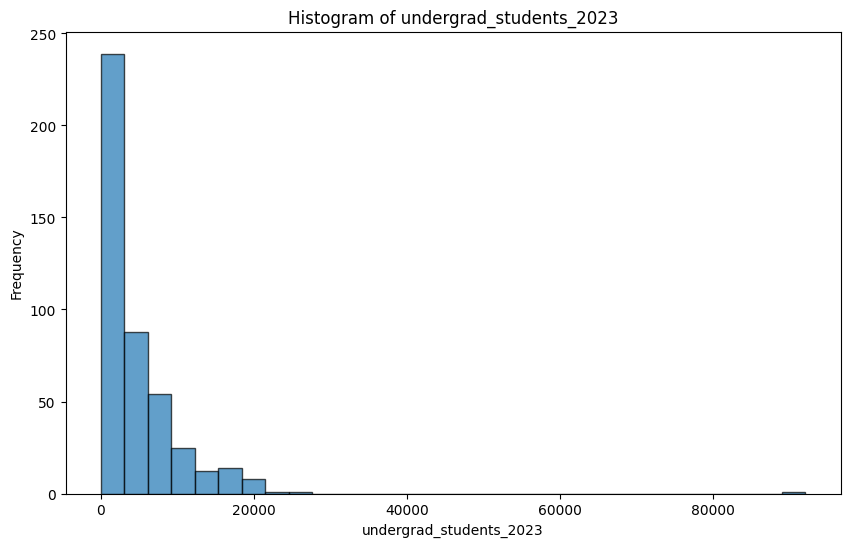

'undergrad_students_2023' column outliers:
    university_name  undergrad_students_2023
3             가천대학교                    20563
20            건국대학교                    15688
40            경북대학교                    21658
44          경상국립대학교                    14990
52            경희대학교                    25960
54            계명대학교                    20789
57            고려대학교                    20373
80          국립부경대학교                    15304
113           대구대학교                    15756
142           동아대학교                    17869
172           부산대학교                    19759
196           서울대학교                    16662
198        서울사이버대학교                    16496
214          성균관대학교                    19487
255           연세대학교                    20335
259           영남대학교                    20332
291         이화여자대학교                    15940
300           인하대학교                    17798
307           전남대학교                    16165
310           전북대학교                    17800
322         

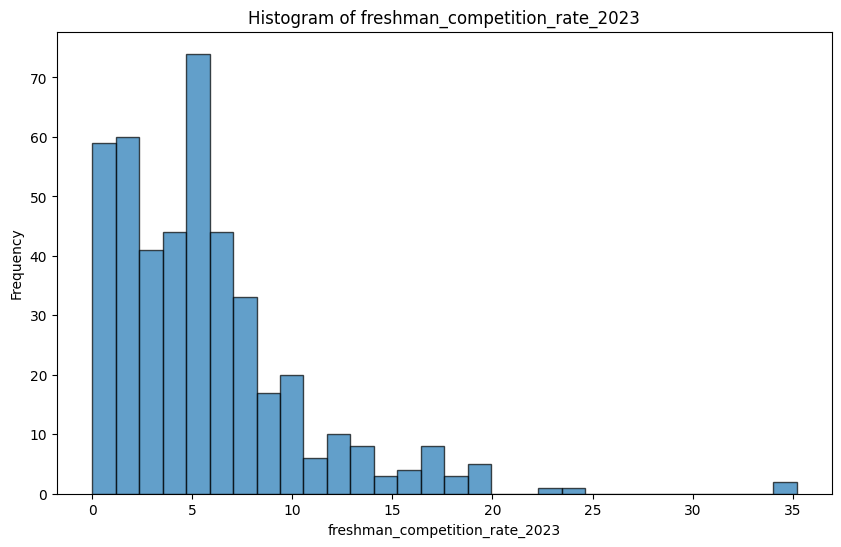

'freshman_competition_rate_2023' column outliers:
    university_name  freshman_competition_rate_2023
3             가천대학교                            16.8
7            가톨릭대학교                            34.5
20            건국대학교                            17.4
27            경기대학교                            18.9
66          광주과학기술원                            19.3
109       대구경북과학기술원                            18.7
133           동국대학교                            19.0
143       동아방송예술대학교                            16.7
187           서강대학교                            18.7
188           서경대학교                            16.8
202         서울여자대학교                            15.9
203         서울예술대학교                            35.2
214          성균관대학교                            18.8
220           세종대학교                            17.5
247           아주대학교                            17.4
325           중앙대학교                            23.5
372      한국에너지공과대학교                            17.4
375        한국예

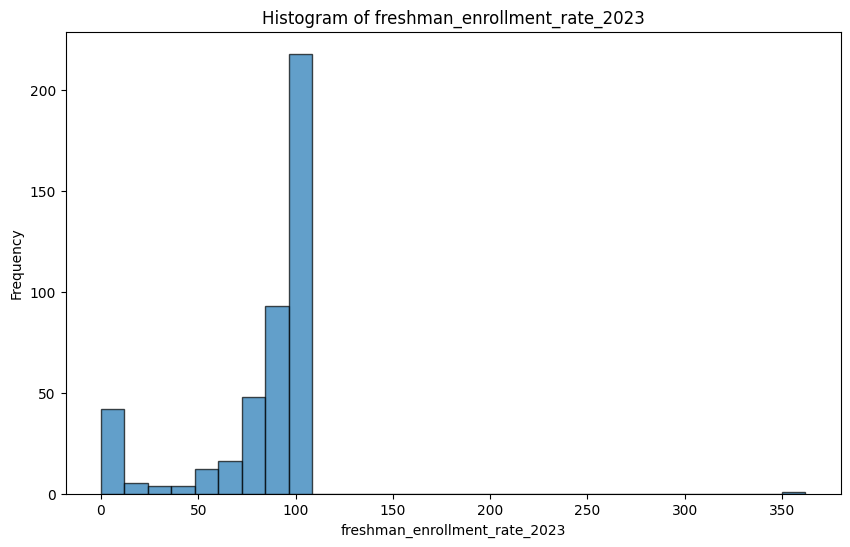

'freshman_enrollment_rate_2023' column outliers:
         university_name  freshman_enrollment_rate_2023
1              가야대학교(고령)                            0.0
28             경남과학기술대학교                            0.0
33                 경동대학교                           50.0
36                 경동대학교                            0.0
47            경운대학교(산업대)                            0.0
49               경인교육대학교                            0.0
63               광양보건대학교                            6.8
65              광주가톨릭대학교                           32.5
72               구세군사관학교                            0.0
97                 김포대학교                           46.1
103          남서울대학교(산업대)                            0.0
114              대구미래대학교                            0.0
117              대구예술대학교                           21.4
118             대구외국어대학교                            0.0
125             대전가톨릭대학교                           20.0
129              대전신학대학교                           18.8

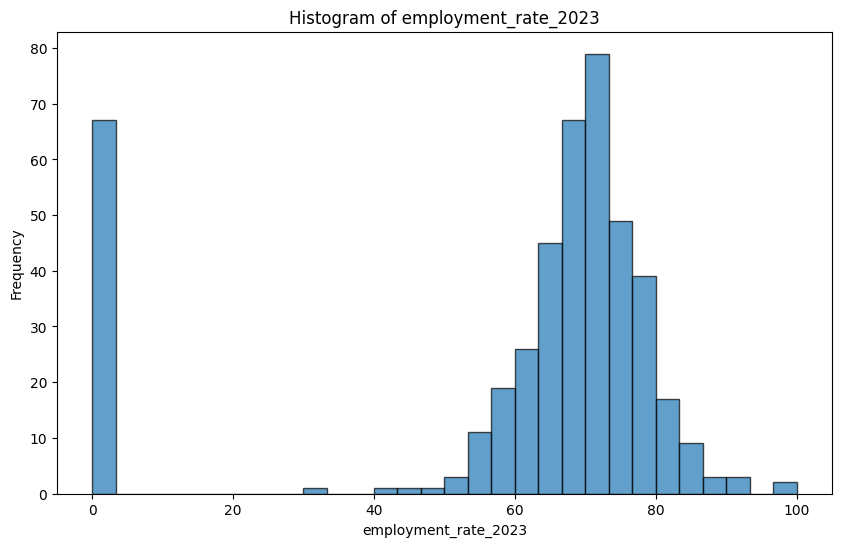

'employment_rate_2023' column outliers:
    university_name  employment_rate_2023
1         가야대학교(고령)                   0.0
6            가톨릭대학교                   0.0
10         감리교신학대학교                   0.0
24         건양사이버대학교                   0.0
36            경동대학교                   0.0
..              ...                   ...
419      한밭대학교(산업대)                   0.0
420           한북대학교                   0.0
427        한양사이버대학교                   0.0
431           한중대학교                   0.0
442        화신사이버대학교                   0.0

[70 rows x 2 columns]



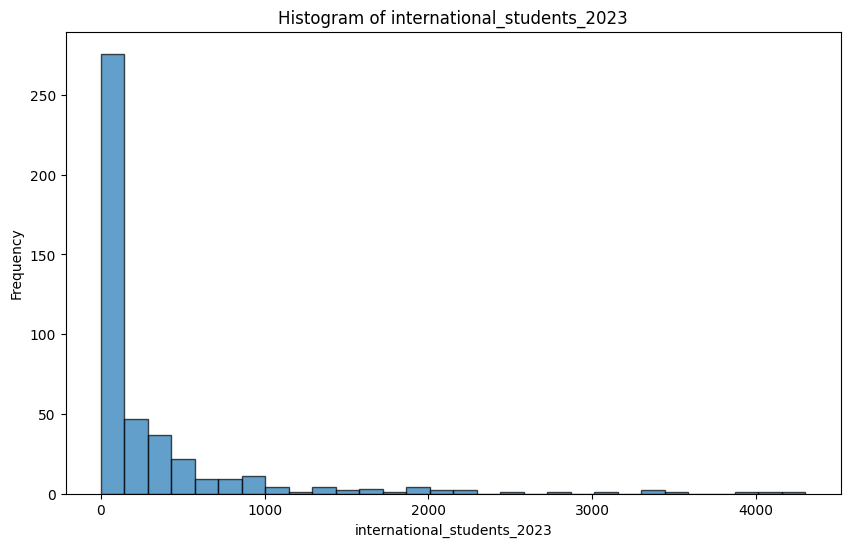

'international_students_2023' column outliers:
    university_name  international_students_2023
3             가천대학교                         2743
8            가톨릭대학교                          815
20            건국대학교                         2185
26            경기대학교                          980
40            경북대학교                         1371
45            경성대학교                         1084
52            경희대학교                         4302
54            계명대학교                         1719
57            고려대학교                         3358
64            광운대학교                          989
70          광주여자대학교                          883
80          국립부경대학교                         1062
87            국민대학교                         1951
102          남서울대학교                         1219
106           단국대학교                          945
113           대구대학교                         1415
119         대구한의대학교                          822
133           동국대학교                         1833
139           동서대학교   

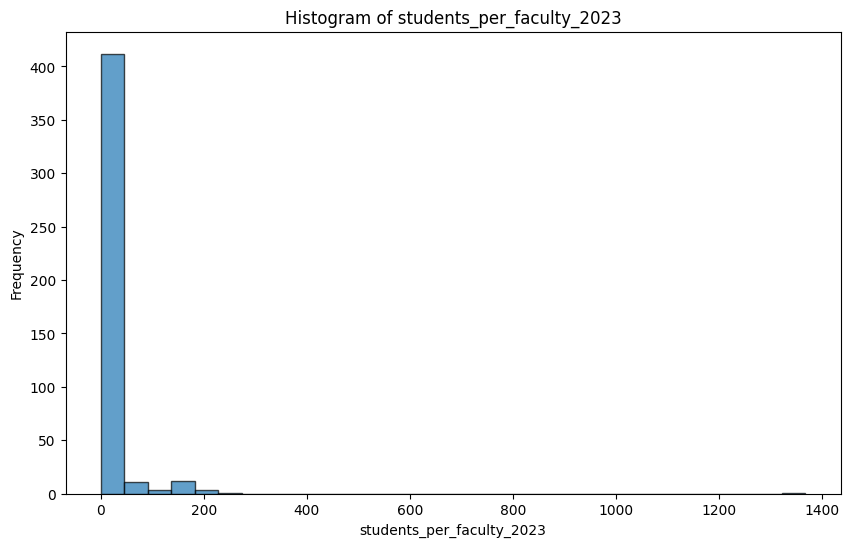

'students_per_faculty_2023' column outliers:
    university_name  students_per_faculty_2023
1         가야대학교(고령)                       0.00
7            가톨릭대학교                       2.79
10         감리교신학대학교                      67.19
24         건양사이버대학교                     176.00
28        경남과학기술대학교                       0.00
..              ...                        ...
419      한밭대학교(산업대)                       0.00
420           한북대학교                       0.00
427        한양사이버대학교                     155.19
431           한중대학교                       0.00
442        화신사이버대학교                     158.67

[66 rows x 2 columns]



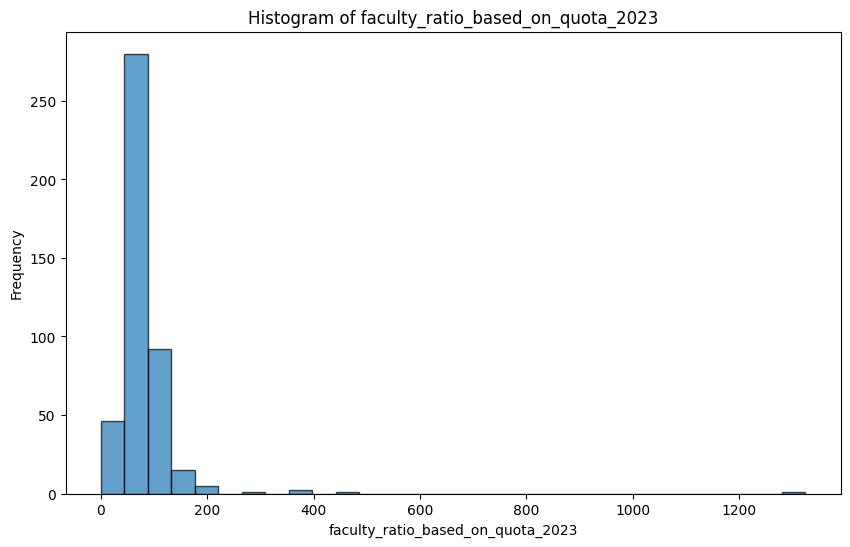

'faculty_ratio_based_on_quota_2023' column outliers:
    university_name  faculty_ratio_based_on_quota_2023
1         가야대학교(고령)                               0.00
7            가톨릭대학교                             471.64
28        경남과학기술대학교                               0.00
33            경동대학교                             357.14
36            경동대학교                               0.00
..              ...                                ...
416           한려대학교                               0.00
417           한림대학교                             173.15
419      한밭대학교(산업대)                               0.00
420           한북대학교                               0.00
431           한중대학교                               0.00

[67 rows x 2 columns]



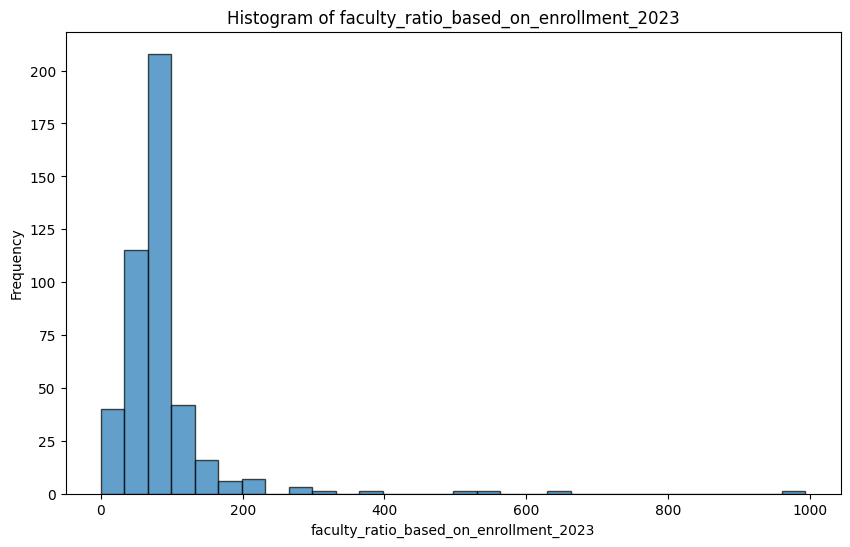

'faculty_ratio_based_on_enrollment_2023' column outliers:
    university_name  faculty_ratio_based_on_enrollment_2023
1         가야대학교(고령)                                    0.00
7            가톨릭대학교                                  521.81
28        경남과학기술대학교                                    0.00
36            경동대학교                                    0.00
47       경운대학교(산업대)                                    0.00
..              ...                                     ...
417           한림대학교                                  173.55
419      한밭대학교(산업대)                                    0.00
420           한북대학교                                    0.00
431           한중대학교                                    0.00
441        화성의과학대학교                                  138.10

[76 rows x 2 columns]



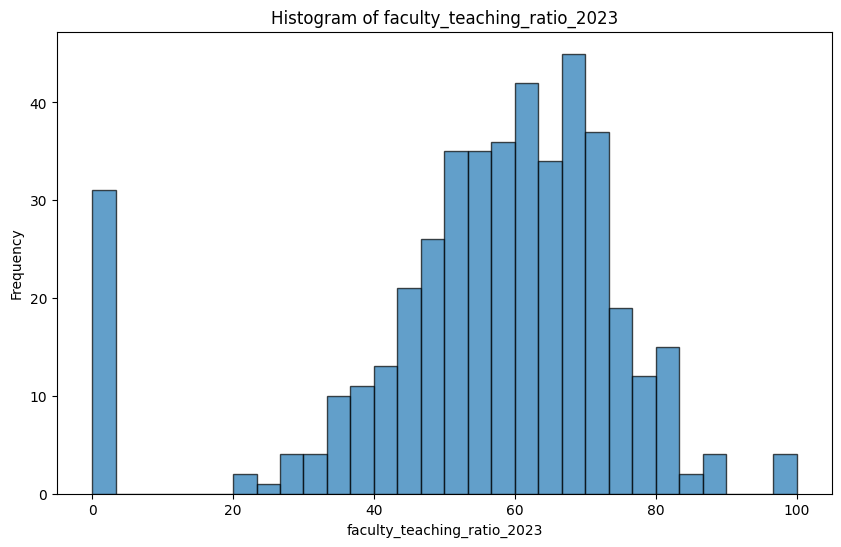

'faculty_teaching_ratio_2023' column outliers:
         university_name  faculty_teaching_ratio_2023
1              가야대학교(고령)                          0.0
36                 경동대학교                          0.0
47            경운대학교(산업대)                          0.0
72               구세군사관학교                          0.0
103          남서울대학교(산업대)                          0.0
114              대구미래대학교                          0.0
118             대구외국어대학교                          0.0
138               동부산대학교                          0.0
147                 동우대학                          0.0
186              상지영서대학교                          0.0
189                서남대학교                          0.0
190                서남대학교                          0.0
209                 서해대학                          0.0
216              성심외국어대학                          0.0
245                신흥대학교                          0.0
263            영산대학교(양산)                          0.0
264           영산대학교(해운대)           

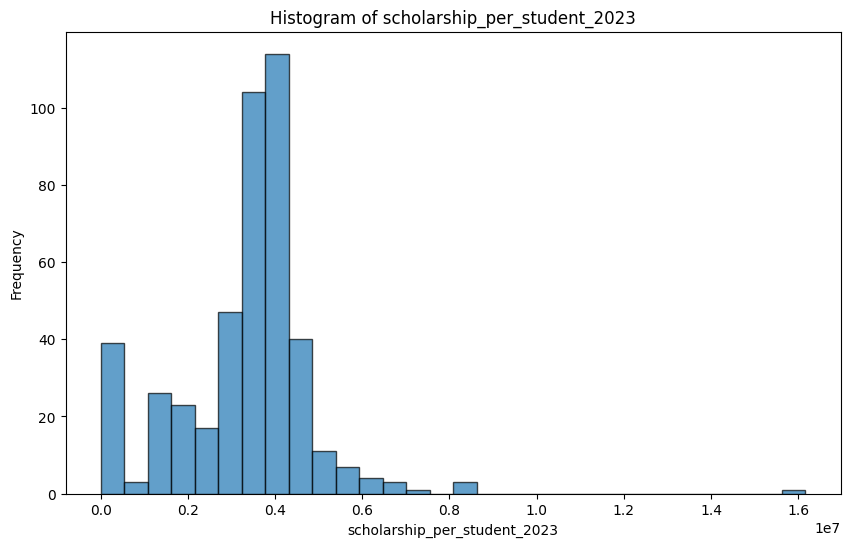

'scholarship_per_student_2023' column outliers:
         university_name  scholarship_per_student_2023
1              가야대학교(고령)                           0.0
36                 경동대학교                           0.0
47            경운대학교(산업대)                           0.0
63               광양보건대학교                      200316.5
65              광주가톨릭대학교                           0.0
66               광주과학기술원                     6409258.6
72               구세군사관학교                           0.0
94                 금강대학교                     8587322.4
103          남서울대학교(산업대)                           0.0
114              대구미래대학교                           0.0
118             대구외국어대학교                           0.0
138               동부산대학교                           0.0
147                 동우대학                           0.0
169              부산경상대학교                     6178028.7
189                서남대학교                           0.0
190                서남대학교                           0.0
209              

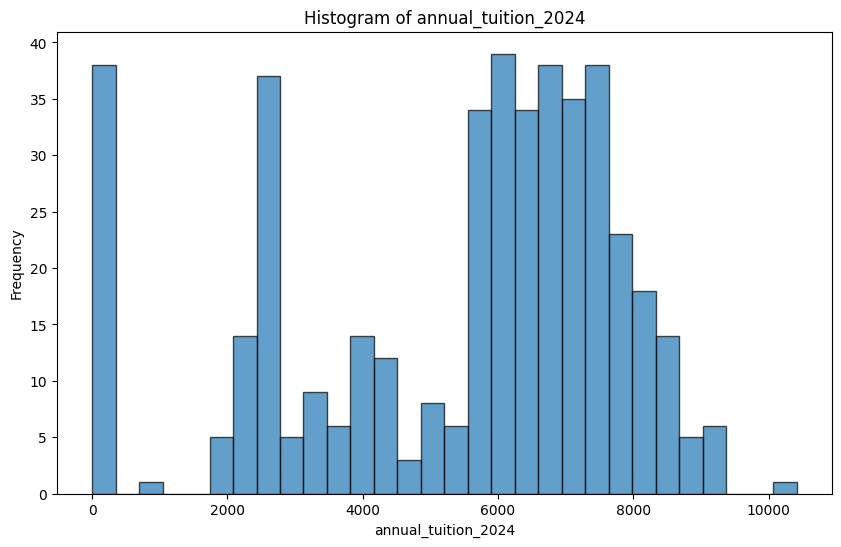

'annual_tuition_2024' column outliers:
No outliers found.



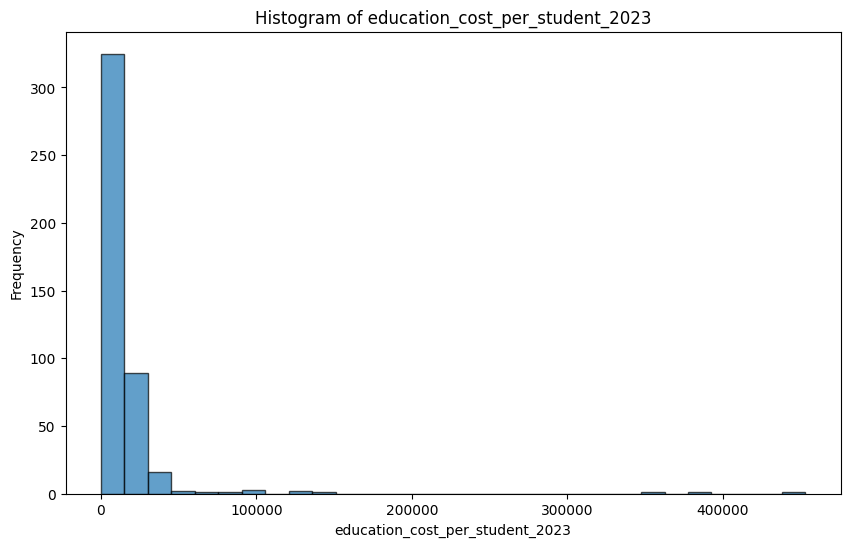

'education_cost_per_student_2023' column outliers:
    university_name  education_cost_per_student_2023
0          ICT폴리텍대학                          30475.9
1         가야대학교(고령)                              0.0
6            가톨릭대학교                              0.0
7            가톨릭대학교                              0.0
8            가톨릭대학교                          28703.8
..              ...                              ...
419      한밭대학교(산업대)                              0.0
420           한북대학교                              0.0
425           한양대학교                          27686.7
431           한중대학교                              0.0
440           홍익대학교                              0.0

[97 rows x 2 columns]



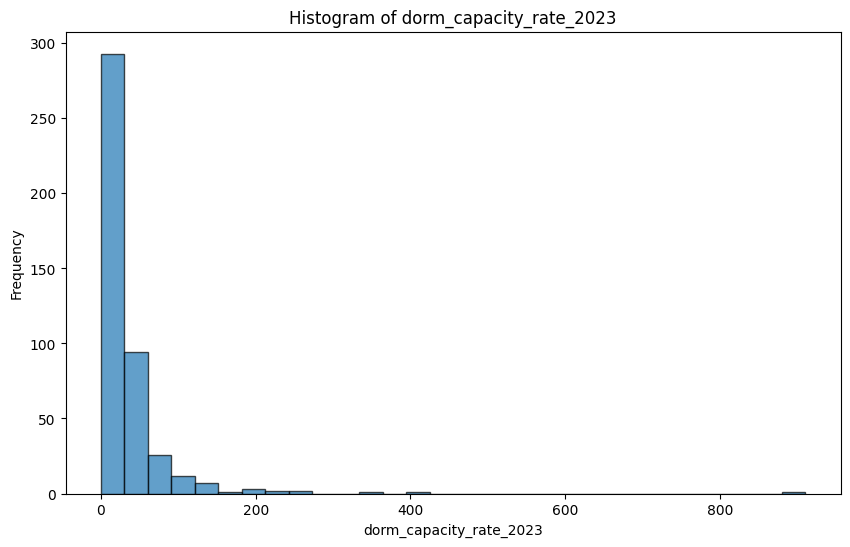

'dorm_capacity_rate_2023' column outliers:
           university_name  dorm_capacity_rate_2023
0                 ICT폴리텍대학                     86.7
6                   가톨릭대학교                    107.7
15                 강원관광대학교                    140.8
42                 경북보건대학교                     94.8
65                광주가톨릭대학교                    234.7
66                 광주과학기술원                     99.8
79               국립목포해양대학교                     85.2
94                   금강대학교                    154.9
109              대구경북과학기술원                    109.6
125               대전가톨릭대학교                    910.5
227               수원가톨릭대학교                    141.5
232               순복음총회신학교                    139.1
248               아주자동차대학교                    103.9
252                  안양대학교                     80.0
265                영산선학대학교                    347.1
278                울산과학기술원                     79.1
281                웅지세무대학교                     91.4
327                중앙

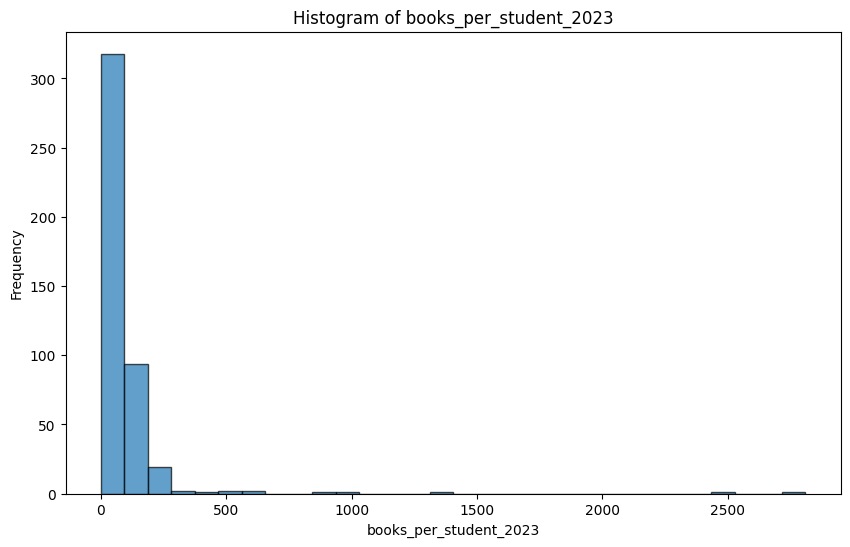

'books_per_student_2023' column outliers:
         university_name  books_per_student_2023
63               광양보건대학교                   252.9
65              광주가톨릭대학교                  2515.7
94                 금강대학교                   610.9
117              대구예술대학교                   207.2
125             대전가톨릭대학교                  2810.4
129              대전신학대학교                   556.4
178              부산장신대학교                   222.9
191               서라벌대학교                   217.8
204              서울장신대학교                   201.7
227             수원가톨릭대학교                   934.5
232             순복음총회신학교                   199.7
238               신경주대학교                   537.8
260              영남신학대학교                   210.5
265              영산선학대학교                  1366.8
311              전주교육대학교                   239.1
327              중앙승가대학교                   572.9
329              진주교육대학교                   198.1
339              청주교육대학교                   207.0
342                총신대학교   

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 데이터 컬럼 선택
numerical_columns = univ_df.select_dtypes(include=['number']).columns

# 각 수치형 데이터에 대해 히스토그램 그리기 및 이상치 계산
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(univ_df[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # 이상치 계산
    Q1 = univ_df[column].quantile(0.25)
    Q3 = univ_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = univ_df[(univ_df[column] < lower_bound) | (univ_df[column] > upper_bound)]

    print(f"'{column}' column outliers:")
    if not outliers.empty:
        print(outliers[['university_name', column]])
    else:
        print("No outliers found.")
    print()

**로그 변환할 것**
- undergrad_admission_quota_2023
- undergrad_graduates_2023
- full_time_faculty_2023
- undergrad_students_2023
- freshman_competition_rate_2023
- international_students_2023
- students_per_faculty_2023
- faculty_ratio_based_on_quota_2023
- faculty_ratio_based_on_enrollement_2023
- dorm_capacity_rate_2023
- books_per_student_2023

**이산화 할 것**
- freshman_enrollment_rate_2023 => 100이상인 거는 그냥 100으로 취급.

**제거할 것**
- freshman_enrollment_rate_2023 => 0인 것은 제거
- employment_rate_2023 => 0인 것은 제거
- faculty_teaching_ratio_2023 => 0인 것은 제거
- scholarship_per_student_2023 => 0인 것은 제거
- annual_tuition_2024 => 0인 것은 제거
- education_cost_per_student_2023 => 0인 것은 제거

In [ ]:
# 제거할 조건을 정의한 열 목록
columns_to_check = [
    'freshman_enrollment_rate_2023',
    'employment_rate_2023',
    'faculty_teaching_ratio_2023',
    'scholarship_per_student_2023',
    'annual_tuition_2024',
    'education_cost_per_student_2023'
]

# 각 열에서 값이 0인 행을 제거
for column in columns_to_check:
    univ_df = univ_df[univ_df[column] != 0]

In [ ]:
# freshman_enrollment_rate_2023이 100 이상인 경우 100으로 변경
univ_df['freshman_enrollment_rate_2023'] = univ_df['freshman_enrollment_rate_2023'].apply(lambda x: 100 if x >= 100 else x)

In [ ]:
import numpy as np

# 로그 변환할 열 목록
columns_to_log_transform = [
    'undergrad_admission_quota_2023',
    'undergrad_graduates_2023',
    'full_time_faculty_2023',
    'undergrad_students_2023',
    'freshman_competition_rate_2023',
    'international_students_2023',
    'students_per_faculty_2023',
    'faculty_ratio_based_on_quota_2023',
    'faculty_ratio_based_on_enrollment_2023',
    'dorm_capacity_rate_2023',
    'books_per_student_2023'
]

# 각 열에 대해 로그 변환 (log(x + 1)) 및 컬럼명 변경
for column in columns_to_log_transform:
    log_column = f'log_{column}'
    univ_df[log_column] = np.log1p(univ_df[column])

# 원래 열 삭제
univ_df.drop(columns=columns_to_log_transform, inplace=True)


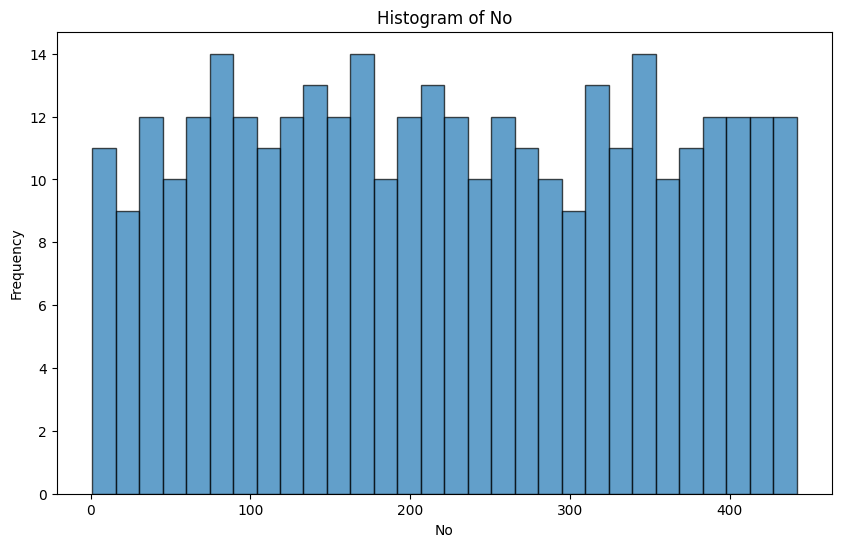

'No' column outliers:
No outliers found.



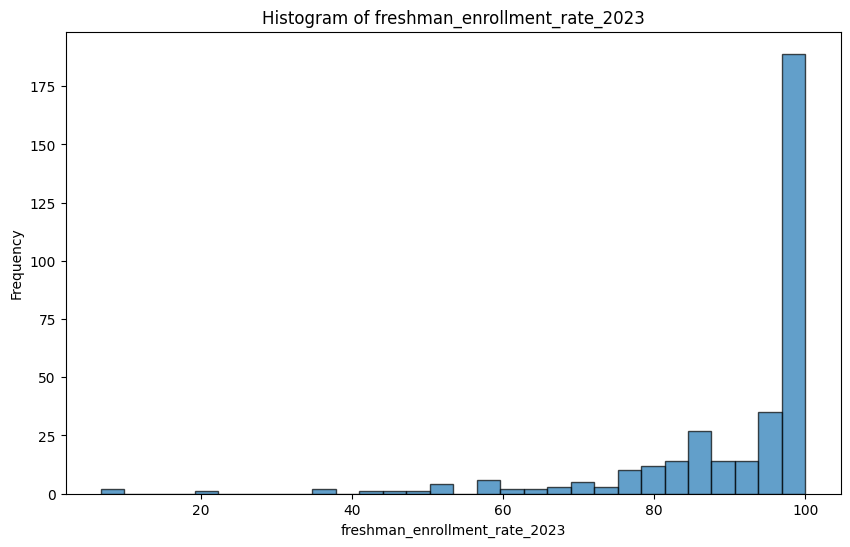

'freshman_enrollment_rate_2023' column outliers:
          university_name  freshman_enrollment_rate_2023
4                가톨릭관동대학교                           60.4
33                  경동대학교                           50.0
63                광양보건대학교                            6.8
88                  국제대학교                           57.9
92                  극동대학교                           57.9
94                  금강대학교                           51.8
97                  김포대학교                           46.1
117               대구예술대학교                           21.4
120                 대덕대학교                           63.3
152               두원공과대학교                           41.5
228               수원과학대학교                           53.1
238                신경주대학교                           57.3
261               영남외국어대학                           61.7
281               웅지세무대학교                           36.0
302                 장안대학교                           36.2
317               제주국제대학교              

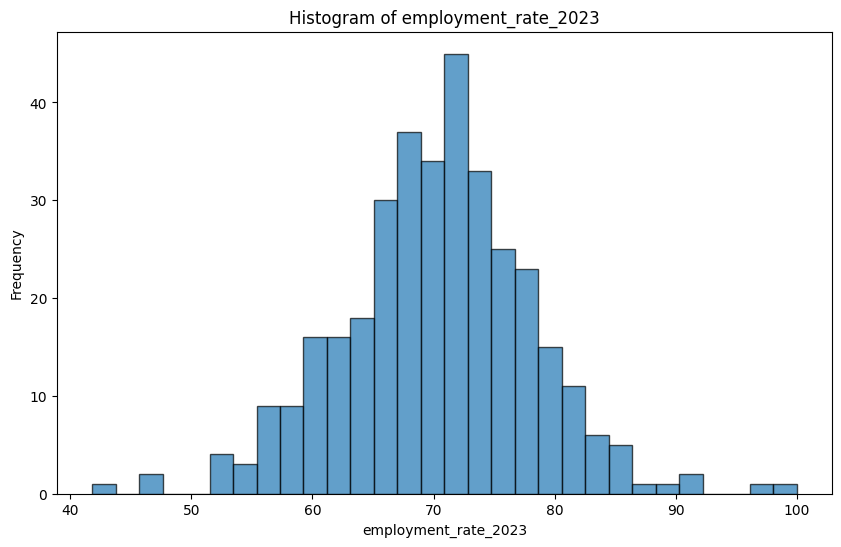

'employment_rate_2023' column outliers:
           university_name  employment_rate_2023
104                  농협대학교                  92.0
176                부산예술대학교                  41.8
281                웅지세무대학교                  46.8
289                  을지대학교                  97.9
384     한국폴리텍 II 대학 남인천캠퍼스                 100.0
401  한국폴리텍 VI 대학 영남융합기술캠퍼스                  92.2
409     한국폴리텍 특성화대학 바이오캠퍼스                  89.5
435                호남신학대학교                  46.4



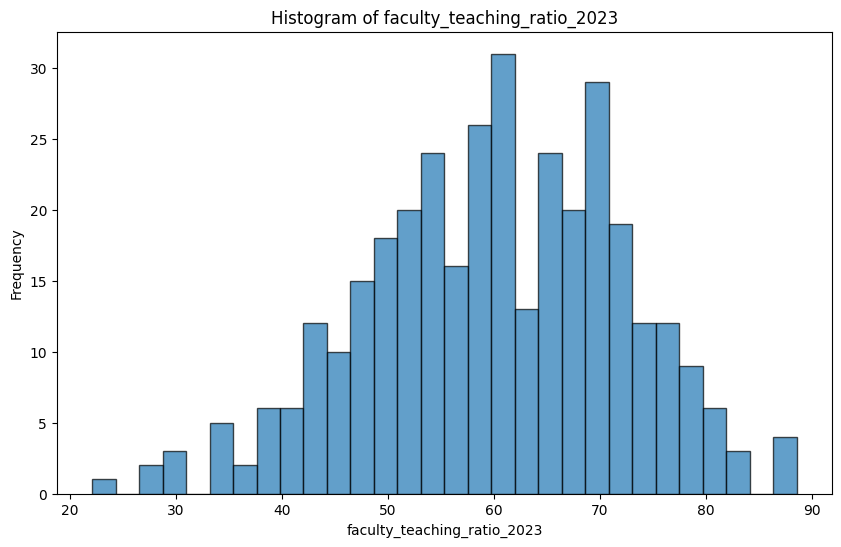

'faculty_teaching_ratio_2023' column outliers:
    university_name  faculty_teaching_ratio_2023
375        한국예술종합학교                         22.1



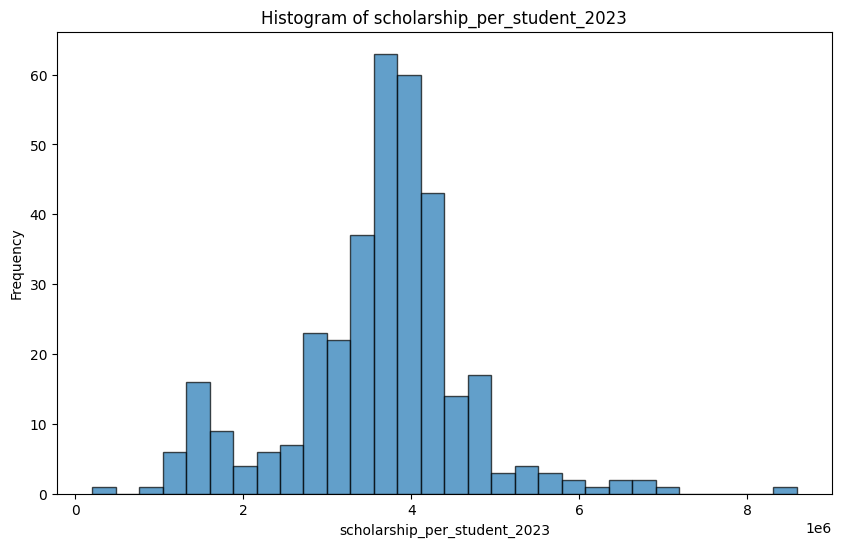

'scholarship_per_student_2023' column outliers:
           university_name  scholarship_per_student_2023
5                가톨릭꽃동네대학교                     5680676.4
63                 광양보건대학교                      200316.5
66                 광주과학기술원                     6409258.6
94                   금강대학교                     8587322.4
169                부산경상대학교                     6178028.7
178                부산장신대학교                     5902532.8
204                서울장신대학교                     6070921.0
278                울산과학기술원                     6481034.1
281                웅지세무대학교                      910183.4
311                전주교육대학교                     1579492.5
339                청주교육대학교                     1732081.0
356                포항공과대학교                     6691295.3
361                한국과학기술원                     7168425.5
379              한국침례신학대학교                     6773814.4
380     한국폴리텍 I 대학 서울강서캠퍼스                     1298861.5
381     한국폴리텍 I 대학 서울정수캠퍼스              

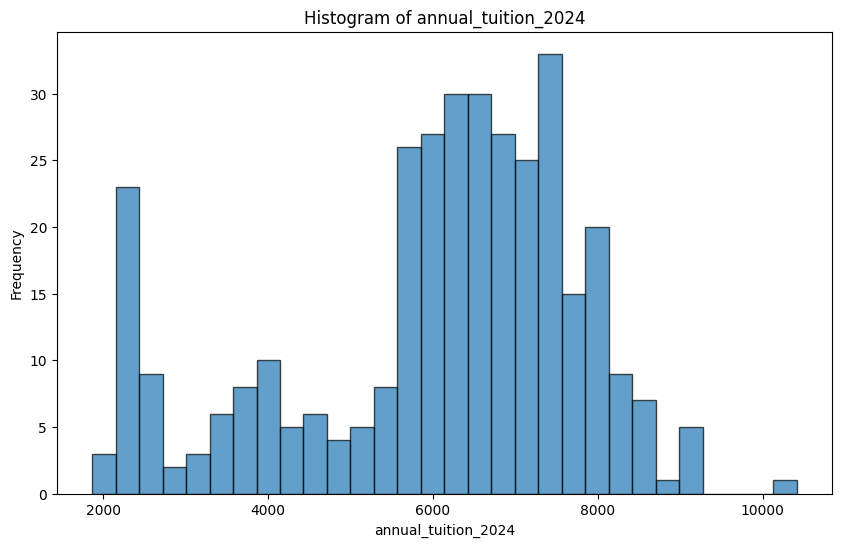

'annual_tuition_2024' column outliers:
           university_name  annual_tuition_2024
0                 ICT폴리텍대학               2500.0
18                 강원도립대학교               2340.8
41                 경북도립대학교               2457.7
66                 광주과학기술원               2060.0
199                서울시립대학교               2396.4
289                  을지대학교              10414.0
308                전남도립대학교               1953.2
347                충남도립대학교               2457.6
349                충북도립대학교               1868.0
380     한국폴리텍 I 대학 서울강서캠퍼스               2494.0
381     한국폴리텍 I 대학 서울정수캠퍼스               2494.0
382       한국폴리텍 I 대학 성남캠퍼스               2432.0
383       한국폴리텍 I 대학 제주캠퍼스               2164.0
384     한국폴리텍 II 대학 남인천캠퍼스               2494.0
385      한국폴리텍 II 대학 인천캠퍼스               2494.0
387     한국폴리텍 III 대학 강릉캠퍼스               2531.5
388     한국폴리텍 III 대학 원주캠퍼스               2174.0
389     한국폴리텍 III 대학 춘천캠퍼스               2432.0
390      한국폴리텍 IV 대학 대전캠퍼스               2432.0
3

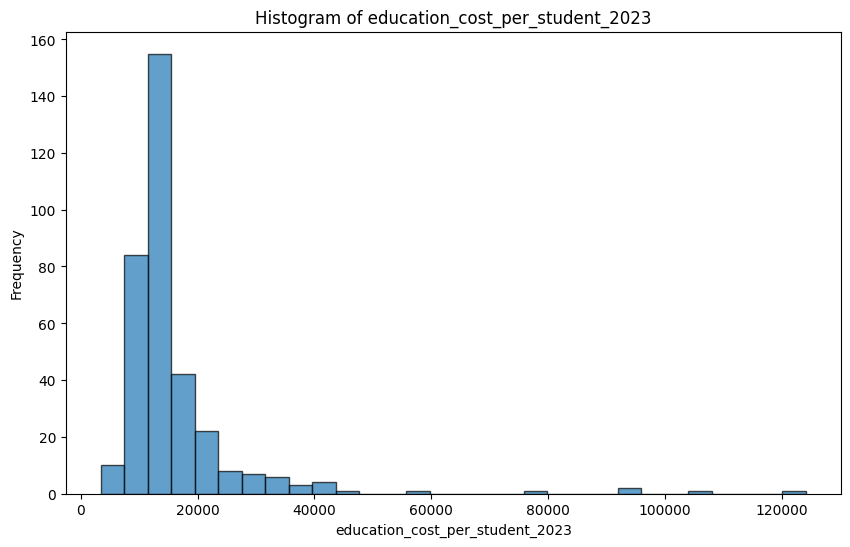

'education_cost_per_student_2023' column outliers:
        university_name  education_cost_per_student_2023
0              ICT폴리텍대학                          30475.9
8                가톨릭대학교                          28703.8
18              강원도립대학교                          33129.3
30             경남도립거창대학                          28146.6
57                고려대학교                          32087.3
66              광주과학기술원                          94641.1
94                금강대학교                          33176.5
104               농협대학교                          33623.9
109           대구경북과학기술원                         104124.6
196               서울대학교                          58038.7
214              성균관대학교                          30169.1
247               아주대학교                          27183.8
255               연세대학교                          39943.1
258               연암대학교                          29671.9
278             울산과학기술원                          77546.0
332             차의과학대학교              

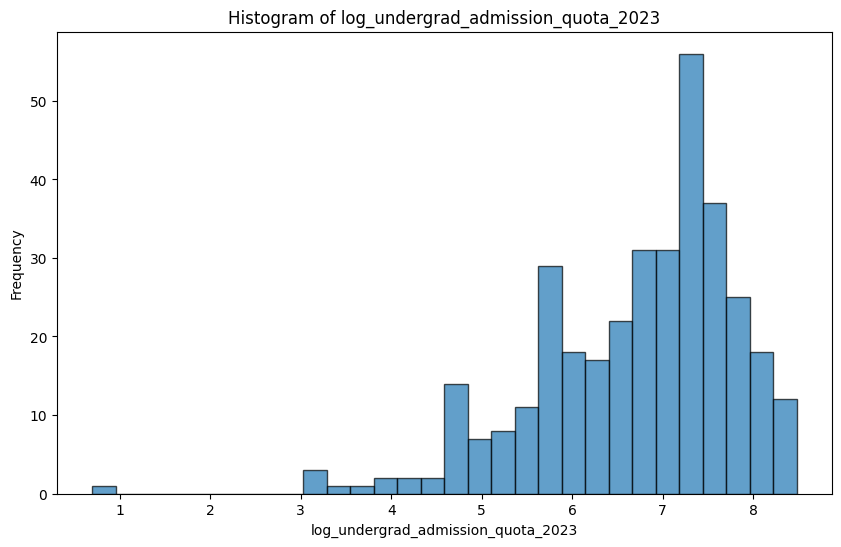

'log_undergrad_admission_quota_2023' column outliers:
        university_name  log_undergrad_admission_quota_2023
33                경동대학교                            0.693147
178             부산장신대학교                            3.496508
289               을지대학교                            3.713572
383    한국폴리텍 I 대학 제주캠퍼스                            3.258097
384  한국폴리텍 II 대학 남인천캠퍼스                            3.258097
402   한국폴리텍 VI 대학 영주캠퍼스                            3.258097



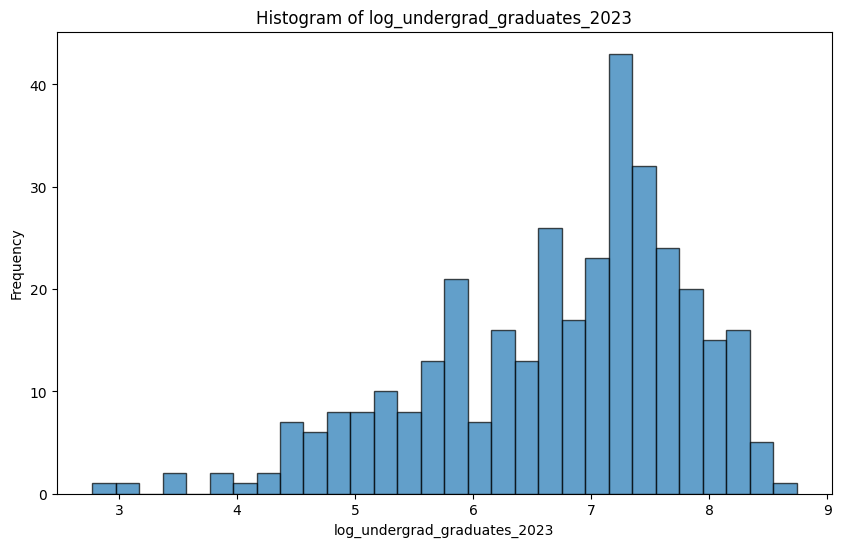

'log_undergrad_graduates_2023' column outliers:
        university_name  log_undergrad_graduates_2023
383    한국폴리텍 I 대학 제주캠퍼스                      2.772589
384  한국폴리텍 II 대학 남인천캠퍼스                      2.995732
402   한국폴리텍 VI 대학 영주캠퍼스                      3.401197



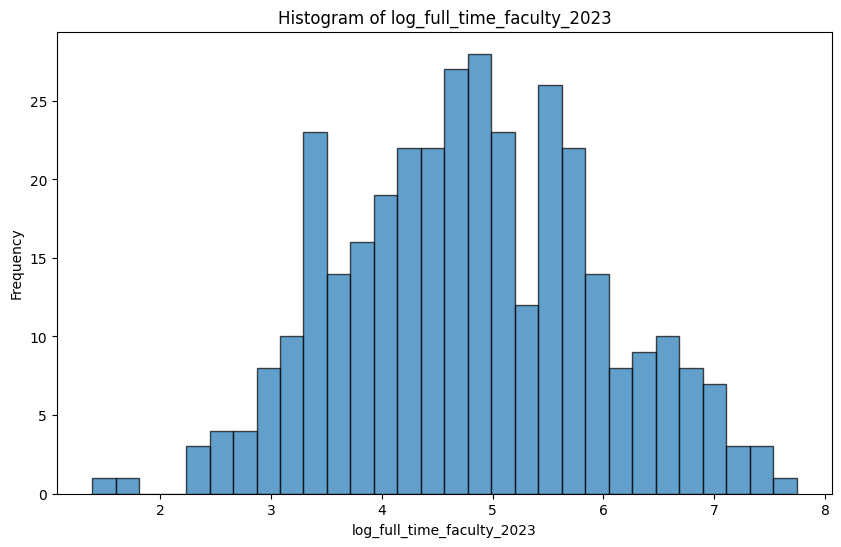

'log_full_time_faculty_2023' column outliers:
       university_name  log_full_time_faculty_2023
402  한국폴리텍 VI 대학 영주캠퍼스                    1.386294



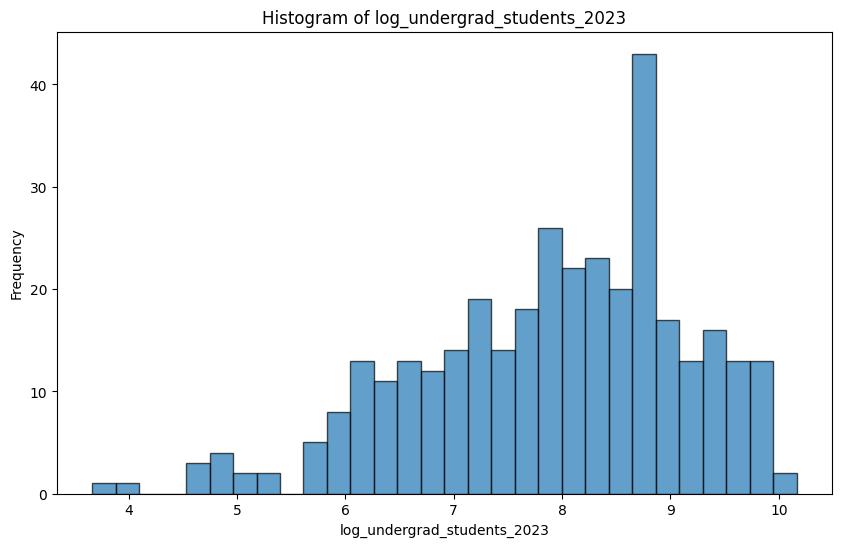

'log_undergrad_students_2023' column outliers:
       university_name  log_undergrad_students_2023
383   한국폴리텍 I 대학 제주캠퍼스                     3.891820
402  한국폴리텍 VI 대학 영주캠퍼스                     3.663562



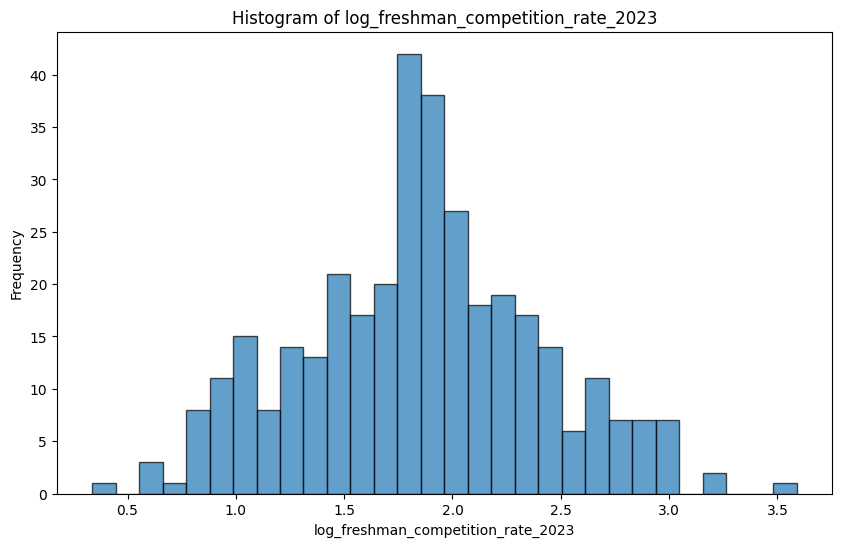

'log_freshman_competition_rate_2023' column outliers:
    university_name  log_freshman_competition_rate_2023
203         서울예술대학교                            3.589059
317         제주국제대학교                            0.336472
325           중앙대학교                            3.198673



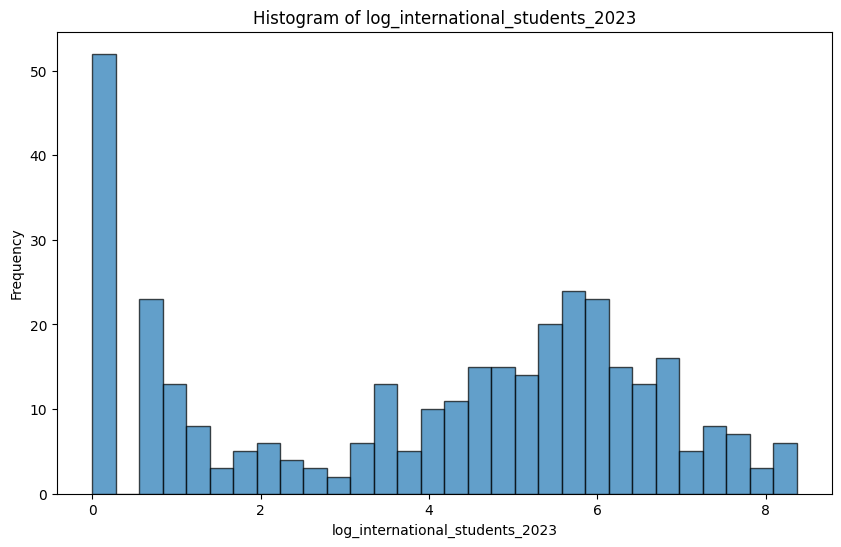

'log_international_students_2023' column outliers:
No outliers found.



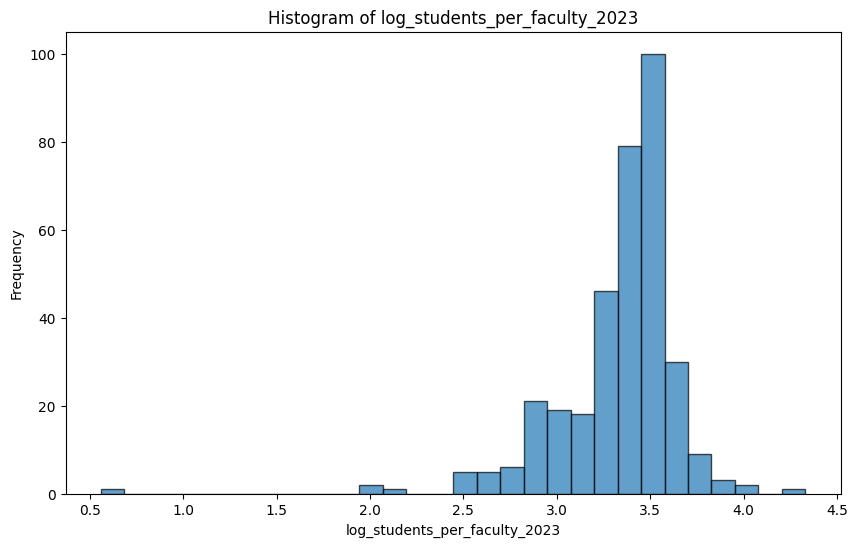

'log_students_per_faculty_2023' column outliers:
        university_name  log_students_per_faculty_2023
33                경동대학교                       1.968510
63              광양보건대학교                       4.040416
66              광주과학기술원                       2.696652
104               농협대학교                       2.665838
117             대구예술대학교                       3.949897
196               서울대학교                       2.661657
228             수원과학대학교                       3.942940
234              순천향대학교                       2.570320
238              신경주대학교                       4.330733
280               울산대학교                       2.624669
289               을지대학교                       0.559616
294               인제대학교                       2.462150
332             차의과학대학교                       2.192770
352               칼빈대학교                       2.811809
375            한국예술종합학교                       2.636912
379           한국침례신학대학교                       3.975186
384  한국폴리텍 II 대학

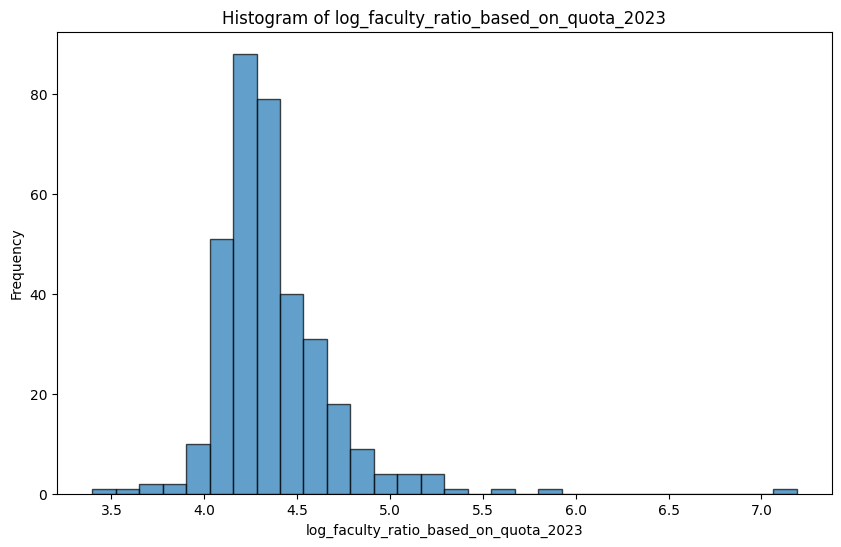

'log_faculty_ratio_based_on_quota_2023' column outliers:
        university_name  log_faculty_ratio_based_on_quota_2023
33                경동대학교                               5.880924
63              광양보건대학교                               3.603049
66              광주과학기술원                               4.973349
104               농협대학교                               5.229557
117             대구예술대학교                               3.693618
234              순천향대학교                               5.114995
238              신경주대학교                               3.396185
280               울산대학교                               5.046581
289               을지대학교                               7.189922
294               인제대학교                               5.195731
332             차의과학대학교                               5.362887
352               칼빈대학교                               4.965777
375            한국예술종합학교                               5.040647
384  한국폴리텍 II 대학 남인천캠퍼스                               5.58975

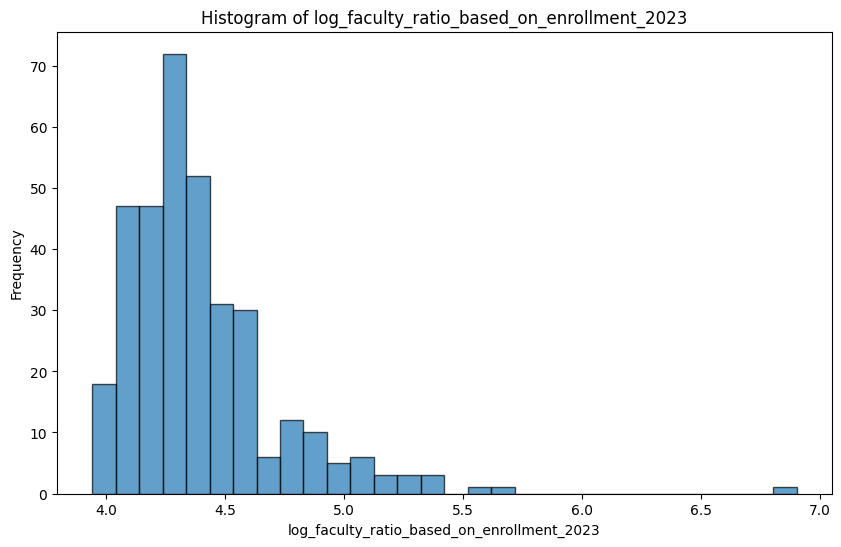

'log_faculty_ratio_based_on_enrollment_2023' column outliers:
           university_name  log_faculty_ratio_based_on_enrollment_2023
63                 광양보건대학교                                    5.658471
94                   금강대학교                                    5.121998
234                 순천향대학교                                    5.044457
280                  울산대학교                                    5.070601
281                웅지세무대학교                                    5.059552
289                  을지대학교                                    6.902491
294                  인제대학교                                    5.281273
317                제주국제대학교                                    5.155659
332                차의과학대학교                                    5.319981
382       한국폴리텍 I 대학 성남캠퍼스                                    4.994980
384     한국폴리텍 II 대학 남인천캠퍼스                                    5.589755
388     한국폴리텍 III 대학 원주캠퍼스                                    5.420535
389     한국폴리텍 I

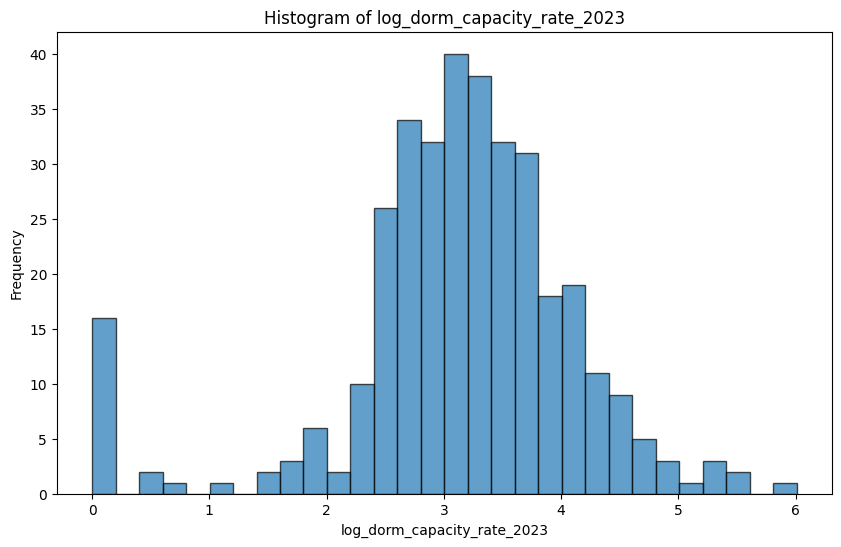

'log_dorm_capacity_rate_2023' column outliers:
           university_name  log_dorm_capacity_rate_2023
50                 경인여자대학교                     0.095310
56                 계원예술대학교                     0.000000
63                 광양보건대학교                     0.000000
122                  대림대학교                     0.470004
135                동남보건대학교                     0.000000
146                동양미래대학교                     1.131402
164                배화여자대학교                     0.000000
182                삼육보건대학교                     0.000000
207                  서일대학교                     0.000000
228                수원과학대학교                     0.000000
230                수원여자대학교                     0.000000
237                숭의여자대학교                     0.000000
242                 신안산대학교                     0.000000
270                예원예술대학교                     0.000000
287                  유한대학교                     0.000000
292                  인덕대학교                     0.641854
3

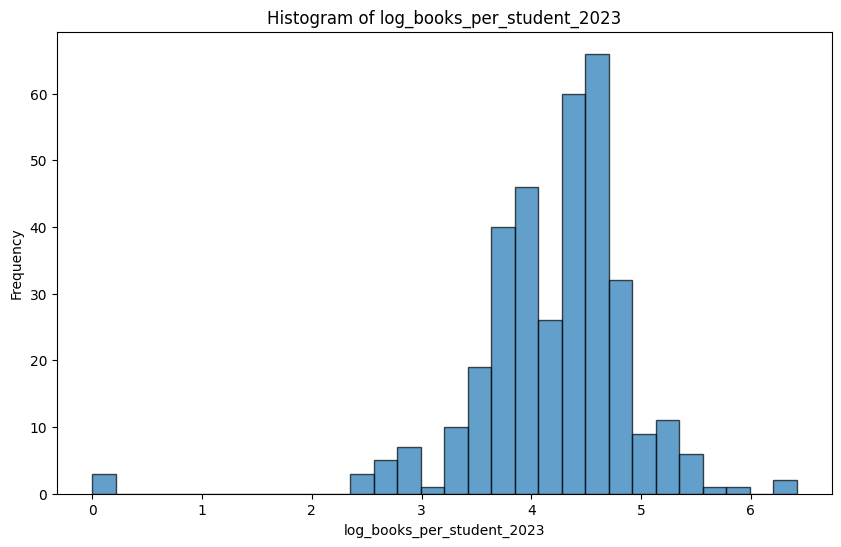

'log_books_per_student_2023' column outliers:
          university_name  log_books_per_student_2023
94                  금강대학교                    6.416569
238                신경주대학교                    6.289344
281               웅지세무대학교                    0.000000
377             한국전통문화대학교                    5.894403
381    한국폴리텍 I 대학 서울정수캠퍼스                    2.493205
385     한국폴리텍 II 대학 인천캠퍼스                    2.476538
390     한국폴리텍 IV 대학 대전캠퍼스                    2.442347
398      한국폴리텍 V 대학 전북캠퍼스                    0.000000
407    한국폴리텍 VII 대학 창원캠퍼스                    2.602690
410  한국폴리텍 특성화대학 반도체융합캠퍼스                    0.000000



In [ ]:
# 수치형 데이터 컬럼 선택
numerical_columns = univ_df.select_dtypes(include=['number']).columns

# 각 수치형 데이터에 대해 히스토그램 그리기 및 이상치 계산
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(univ_df[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # 이상치 계산
    Q1 = univ_df[column].quantile(0.25)
    Q3 = univ_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = univ_df[(univ_df[column] < lower_bound) | (univ_df[column] > upper_bound)]

    print(f"'{column}' column outliers:")
    if not outliers.empty:
        print(outliers[['university_name', column]])
    else:
        print("No outliers found.")
    print()

**로그 변환할 것**
- education_cost_per_student_2023

**이산화할 것**
- log_undergrad_admission_quota_2023 => 3이하인 것은 3으로 통일
- log_undergrad_graduates_2023 => 3이하인 것은 3으로 통일
- log_full_time_faculty_2023 => 2.5 이하인 것은 2.5로 통일
- log_undergrad_students_2023 => 4이하인 것은 4로 통일
- log_students_per_faculty_2023 => 2이하인 것은 2로 통일
- log_faculty_ratio_based_on_quota_2023 => 5.5 이상인 것은 5.5로 통일
- log_faculty_ratio_based_on_enrollment_2023 => 5.5 이상인 것은 5.5로 통일
- log_books_per_student_2023 => 2.5 이하인 것은 2.5로 통일, 6이상인 것은 6으로 통일

In [ ]:
# 로그 변환할 열 목록
columns_to_log_transform = [
    'education_cost_per_student_2023'
]

# 각 열에 대해 로그 변환 (log(x + 1)) 및 컬럼명 변경
for column in columns_to_log_transform:
    log_column = f'log_{column}'
    univ_df[log_column] = np.log1p(univ_df[column])

# 원래 열 삭제
univ_df.drop(columns=columns_to_log_transform, inplace=True)

In [ ]:
# 이산화할 열 목록과 기준값
discretize_rules = {
    'log_undergrad_admission_quota_2023': 3,
    'log_undergrad_graduates_2023': 3,
    'log_full_time_faculty_2023': 2.5,
    'log_undergrad_students_2023': 4,
    'log_students_per_faculty_2023': 2,
    'log_faculty_ratio_based_on_quota_2023_upper': 5.5,
    'log_faculty_ratio_based_on_enrollment_2023_upper': 5.5,
    'log_books_per_student_2023_lower': 2.5,
    'log_books_per_student_2023_upper': 6
}

# 이산화 작업
for column, rule in discretize_rules.items():
    if 'lower' in column:
        original_column = column.replace('_lower', '')
        univ_df[original_column] = univ_df[original_column].apply(lambda x: rule if x <= rule else x)
    elif 'upper' in column:
        original_column = column.replace('_upper', '')
        univ_df[original_column] = univ_df[original_column].apply(lambda x: rule if x >= rule else x)
    else:
        univ_df[column] = univ_df[column].apply(lambda x: rule if x <= rule else x)


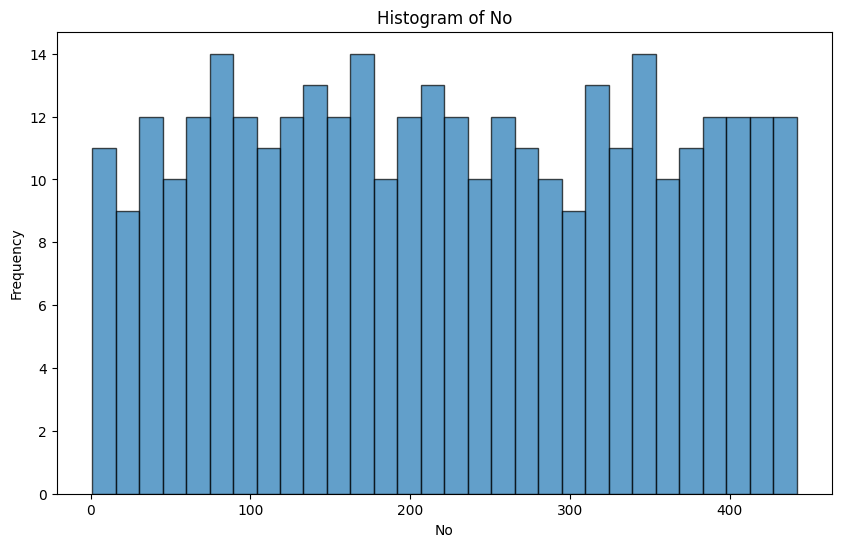

'No' column outliers:
No outliers found.



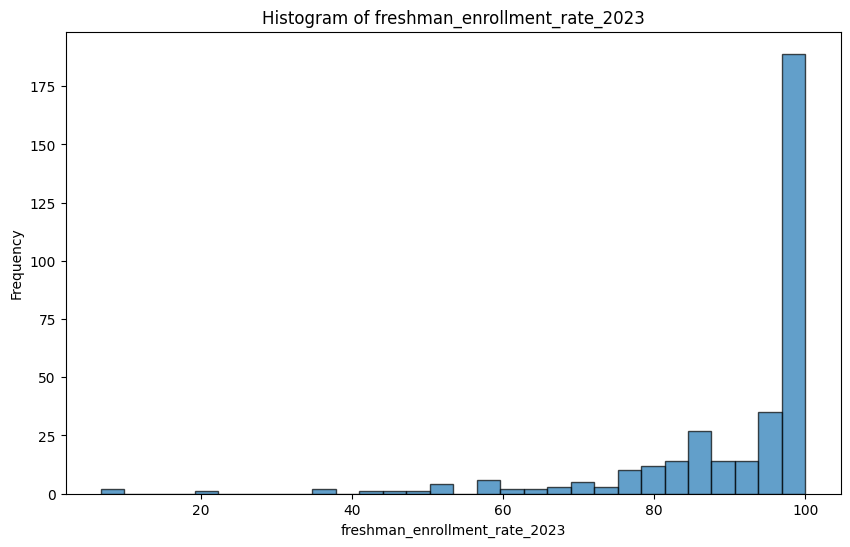

'freshman_enrollment_rate_2023' column outliers:
          university_name  freshman_enrollment_rate_2023
4                가톨릭관동대학교                           60.4
33                  경동대학교                           50.0
63                광양보건대학교                            6.8
88                  국제대학교                           57.9
92                  극동대학교                           57.9
94                  금강대학교                           51.8
97                  김포대학교                           46.1
117               대구예술대학교                           21.4
120                 대덕대학교                           63.3
152               두원공과대학교                           41.5
228               수원과학대학교                           53.1
238                신경주대학교                           57.3
261               영남외국어대학                           61.7
281               웅지세무대학교                           36.0
302                 장안대학교                           36.2
317               제주국제대학교              

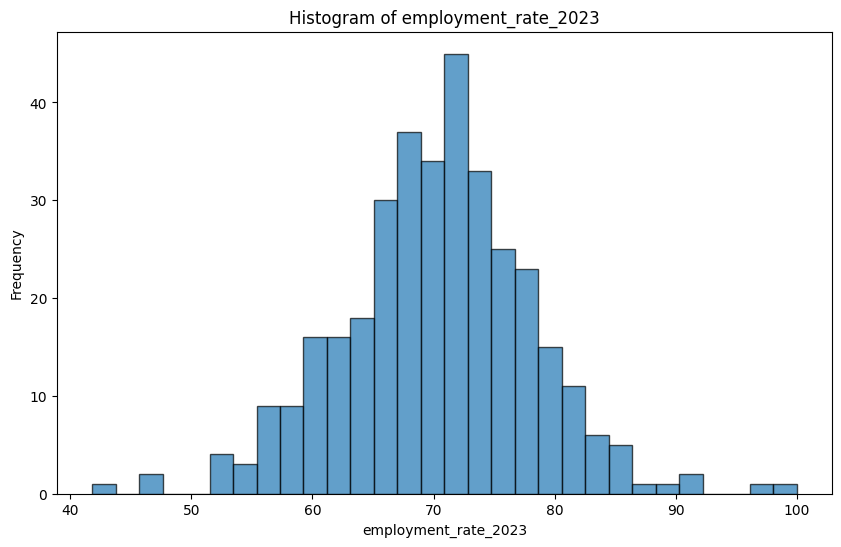

'employment_rate_2023' column outliers:
           university_name  employment_rate_2023
104                  농협대학교                  92.0
176                부산예술대학교                  41.8
281                웅지세무대학교                  46.8
289                  을지대학교                  97.9
384     한국폴리텍 II 대학 남인천캠퍼스                 100.0
401  한국폴리텍 VI 대학 영남융합기술캠퍼스                  92.2
409     한국폴리텍 특성화대학 바이오캠퍼스                  89.5
435                호남신학대학교                  46.4



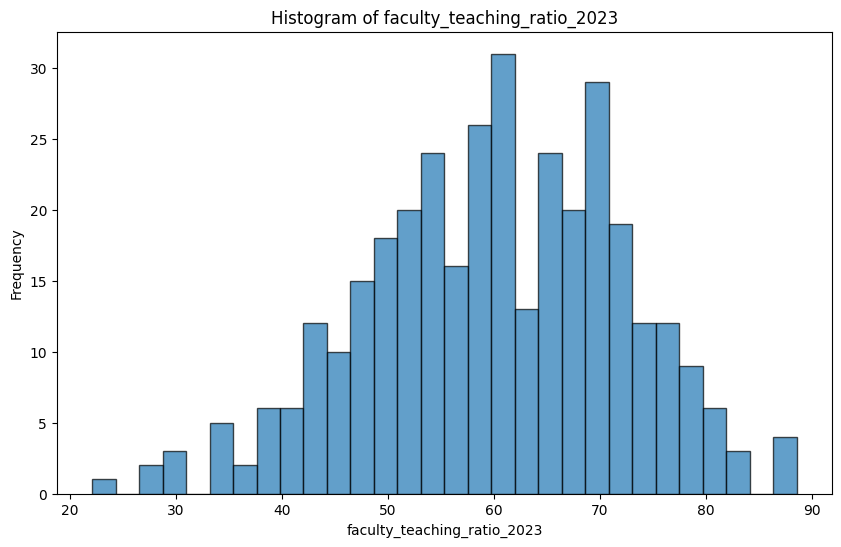

'faculty_teaching_ratio_2023' column outliers:
    university_name  faculty_teaching_ratio_2023
375        한국예술종합학교                         22.1



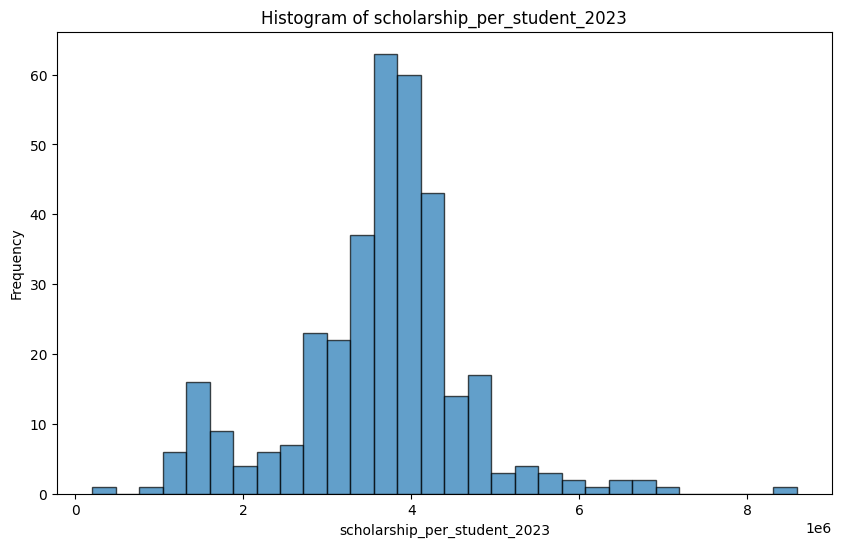

'scholarship_per_student_2023' column outliers:
           university_name  scholarship_per_student_2023
5                가톨릭꽃동네대학교                     5680676.4
63                 광양보건대학교                      200316.5
66                 광주과학기술원                     6409258.6
94                   금강대학교                     8587322.4
169                부산경상대학교                     6178028.7
178                부산장신대학교                     5902532.8
204                서울장신대학교                     6070921.0
278                울산과학기술원                     6481034.1
281                웅지세무대학교                      910183.4
311                전주교육대학교                     1579492.5
339                청주교육대학교                     1732081.0
356                포항공과대학교                     6691295.3
361                한국과학기술원                     7168425.5
379              한국침례신학대학교                     6773814.4
380     한국폴리텍 I 대학 서울강서캠퍼스                     1298861.5
381     한국폴리텍 I 대학 서울정수캠퍼스              

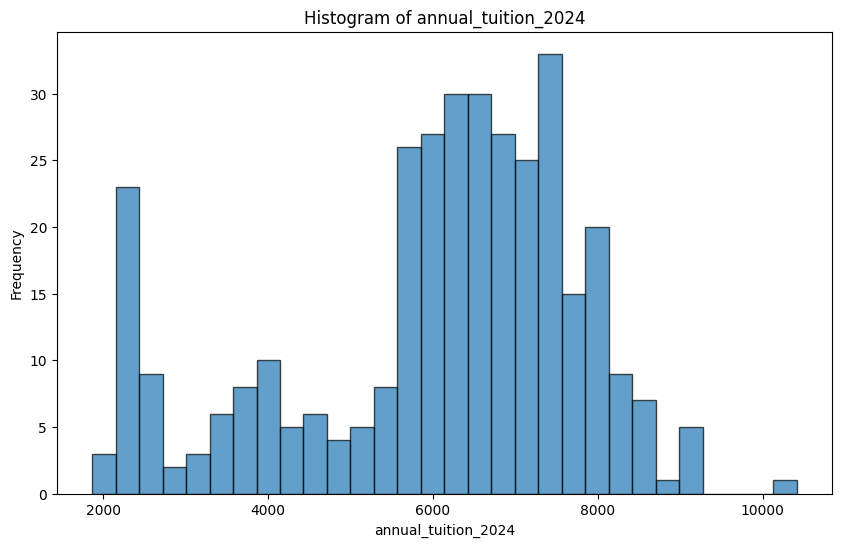

'annual_tuition_2024' column outliers:
           university_name  annual_tuition_2024
0                 ICT폴리텍대학               2500.0
18                 강원도립대학교               2340.8
41                 경북도립대학교               2457.7
66                 광주과학기술원               2060.0
199                서울시립대학교               2396.4
289                  을지대학교              10414.0
308                전남도립대학교               1953.2
347                충남도립대학교               2457.6
349                충북도립대학교               1868.0
380     한국폴리텍 I 대학 서울강서캠퍼스               2494.0
381     한국폴리텍 I 대학 서울정수캠퍼스               2494.0
382       한국폴리텍 I 대학 성남캠퍼스               2432.0
383       한국폴리텍 I 대학 제주캠퍼스               2164.0
384     한국폴리텍 II 대학 남인천캠퍼스               2494.0
385      한국폴리텍 II 대학 인천캠퍼스               2494.0
387     한국폴리텍 III 대학 강릉캠퍼스               2531.5
388     한국폴리텍 III 대학 원주캠퍼스               2174.0
389     한국폴리텍 III 대학 춘천캠퍼스               2432.0
390      한국폴리텍 IV 대학 대전캠퍼스               2432.0
3

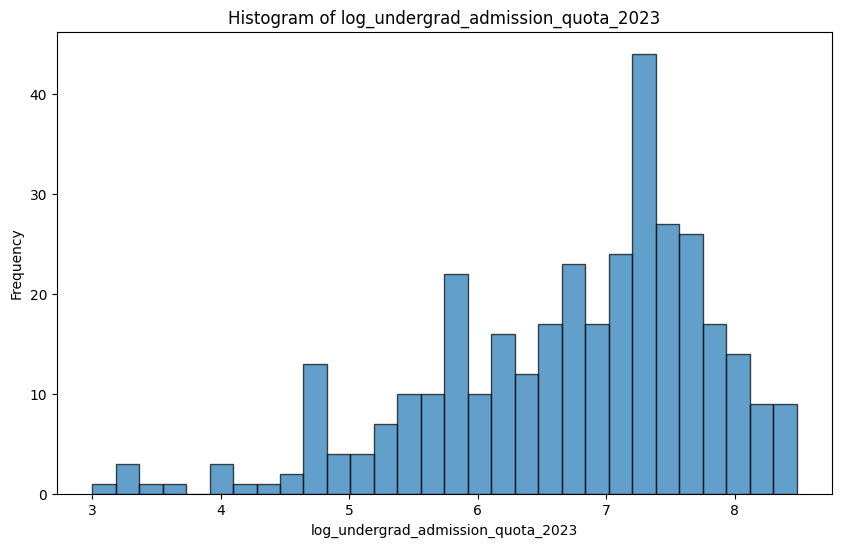

'log_undergrad_admission_quota_2023' column outliers:
        university_name  log_undergrad_admission_quota_2023
33                경동대학교                            3.000000
178             부산장신대학교                            3.496508
289               을지대학교                            3.713572
383    한국폴리텍 I 대학 제주캠퍼스                            3.258097
384  한국폴리텍 II 대학 남인천캠퍼스                            3.258097
402   한국폴리텍 VI 대학 영주캠퍼스                            3.258097



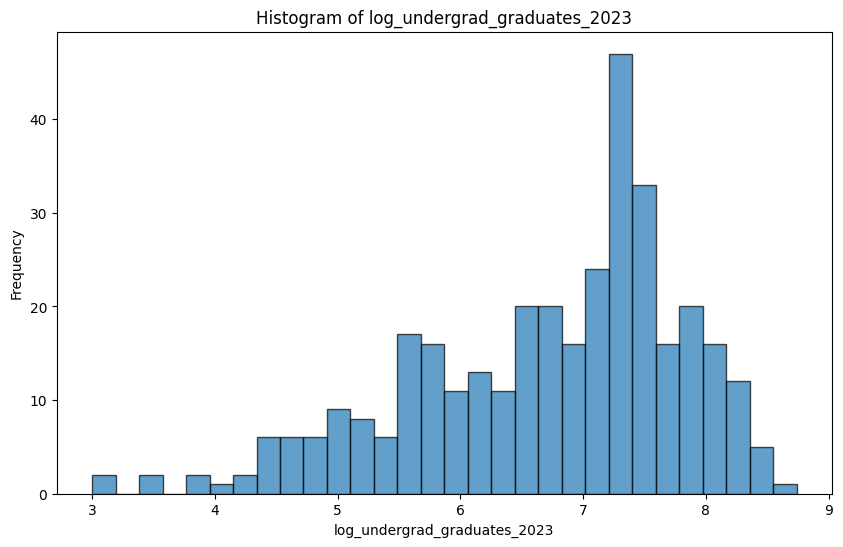

'log_undergrad_graduates_2023' column outliers:
        university_name  log_undergrad_graduates_2023
383    한국폴리텍 I 대학 제주캠퍼스                      3.000000
384  한국폴리텍 II 대학 남인천캠퍼스                      3.000000
402   한국폴리텍 VI 대학 영주캠퍼스                      3.401197



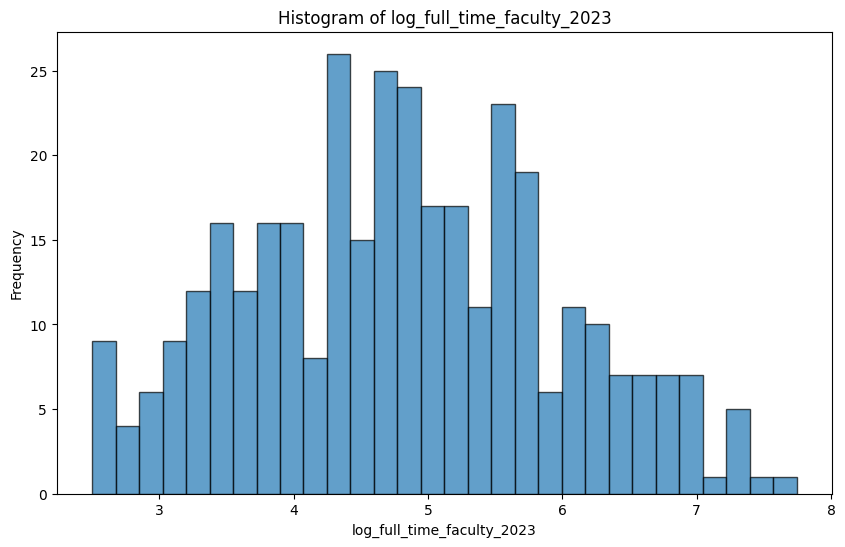

'log_full_time_faculty_2023' column outliers:
No outliers found.



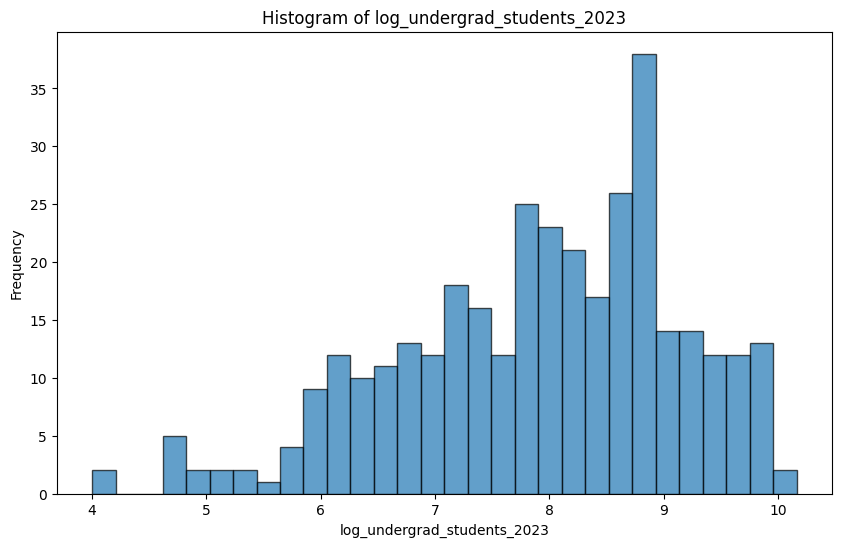

'log_undergrad_students_2023' column outliers:
       university_name  log_undergrad_students_2023
383   한국폴리텍 I 대학 제주캠퍼스                          4.0
402  한국폴리텍 VI 대학 영주캠퍼스                          4.0



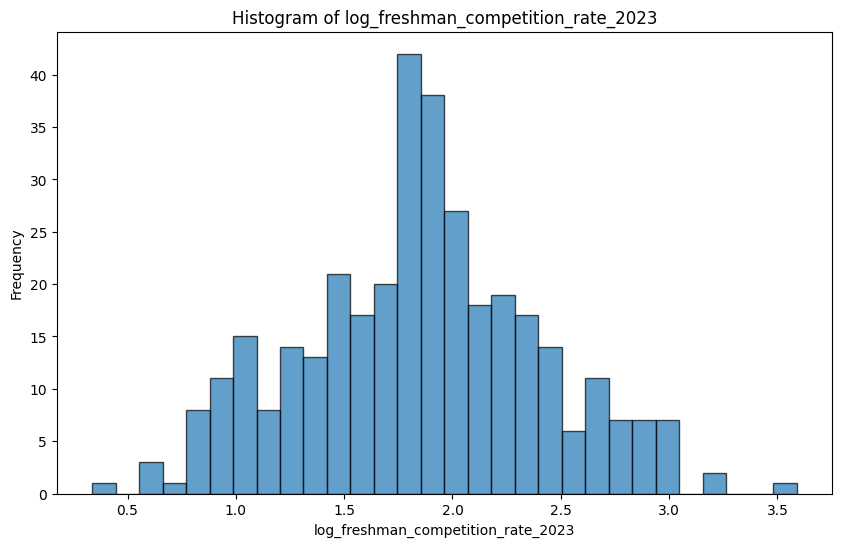

'log_freshman_competition_rate_2023' column outliers:
    university_name  log_freshman_competition_rate_2023
203         서울예술대학교                            3.589059
317         제주국제대학교                            0.336472
325           중앙대학교                            3.198673



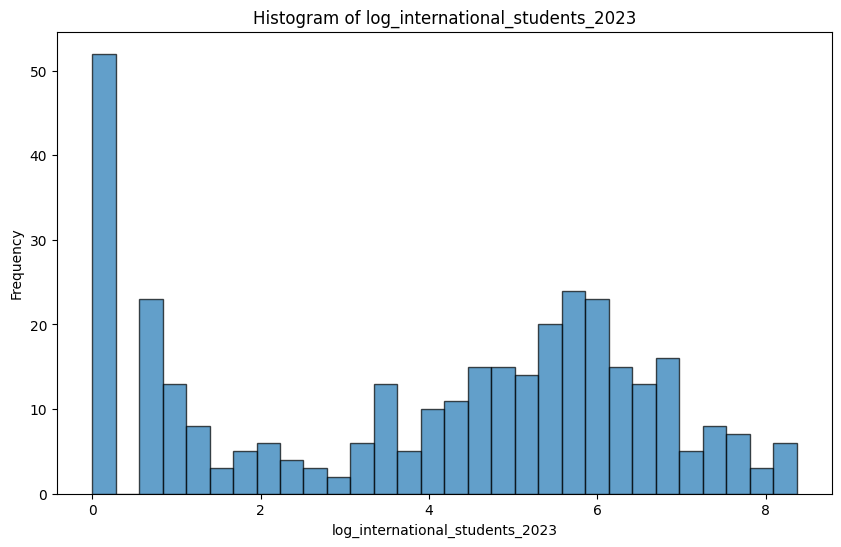

'log_international_students_2023' column outliers:
No outliers found.



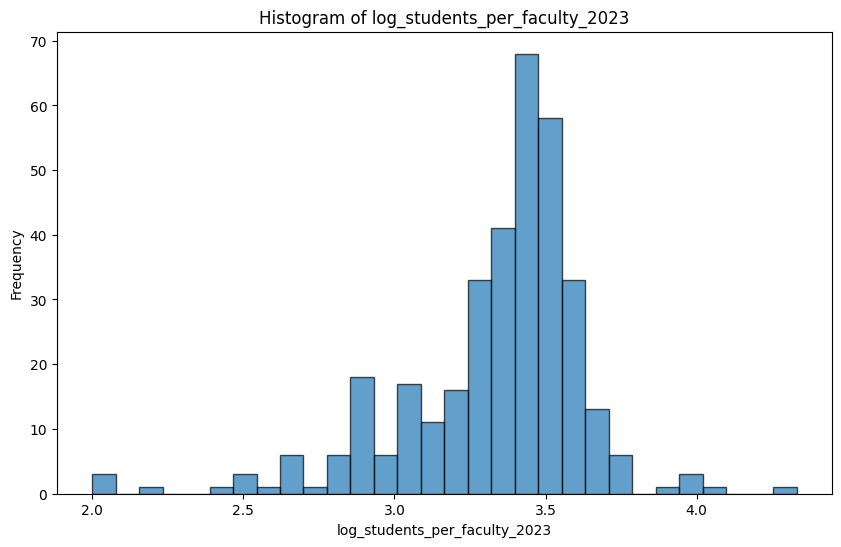

'log_students_per_faculty_2023' column outliers:
        university_name  log_students_per_faculty_2023
33                경동대학교                       2.000000
63              광양보건대학교                       4.040416
66              광주과학기술원                       2.696652
104               농협대학교                       2.665838
117             대구예술대학교                       3.949897
196               서울대학교                       2.661657
228             수원과학대학교                       3.942940
234              순천향대학교                       2.570320
238              신경주대학교                       4.330733
280               울산대학교                       2.624669
289               을지대학교                       2.000000
294               인제대학교                       2.462150
332             차의과학대학교                       2.192770
352               칼빈대학교                       2.811809
375            한국예술종합학교                       2.636912
379           한국침례신학대학교                       3.975186
384  한국폴리텍 II 대학

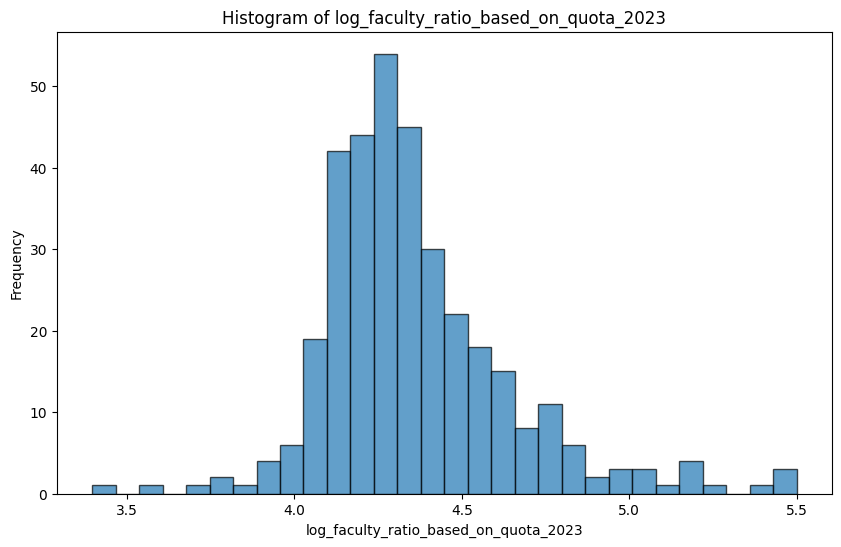

'log_faculty_ratio_based_on_quota_2023' column outliers:
        university_name  log_faculty_ratio_based_on_quota_2023
33                경동대학교                               5.500000
63              광양보건대학교                               3.603049
66              광주과학기술원                               4.973349
104               농협대학교                               5.229557
117             대구예술대학교                               3.693618
234              순천향대학교                               5.114995
238              신경주대학교                               3.396185
280               울산대학교                               5.046581
289               을지대학교                               5.500000
294               인제대학교                               5.195731
332             차의과학대학교                               5.362887
352               칼빈대학교                               4.965777
375            한국예술종합학교                               5.040647
384  한국폴리텍 II 대학 남인천캠퍼스                               5.50000

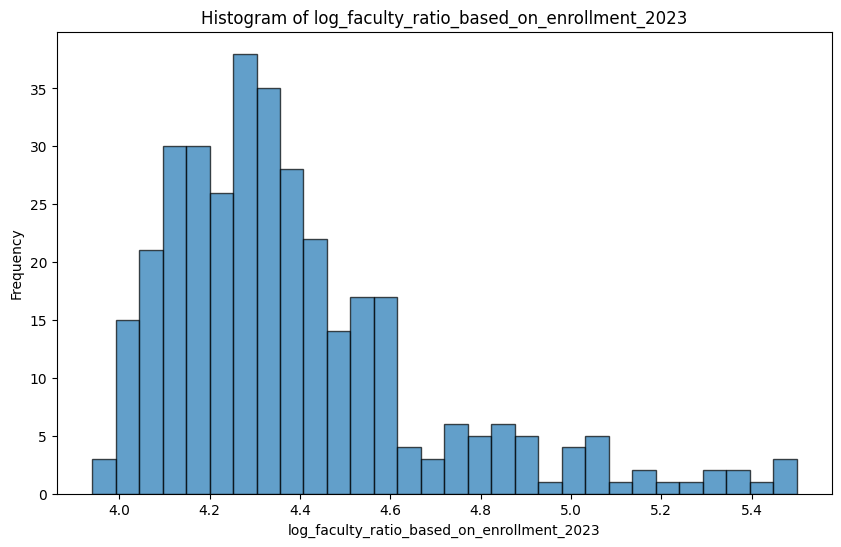

'log_faculty_ratio_based_on_enrollment_2023' column outliers:
           university_name  log_faculty_ratio_based_on_enrollment_2023
63                 광양보건대학교                                    5.500000
94                   금강대학교                                    5.121998
234                 순천향대학교                                    5.044457
280                  울산대학교                                    5.070601
281                웅지세무대학교                                    5.059552
289                  을지대학교                                    5.500000
294                  인제대학교                                    5.281273
317                제주국제대학교                                    5.155659
332                차의과학대학교                                    5.319981
382       한국폴리텍 I 대학 성남캠퍼스                                    4.994980
384     한국폴리텍 II 대학 남인천캠퍼스                                    5.500000
388     한국폴리텍 III 대학 원주캠퍼스                                    5.420535
389     한국폴리텍 I

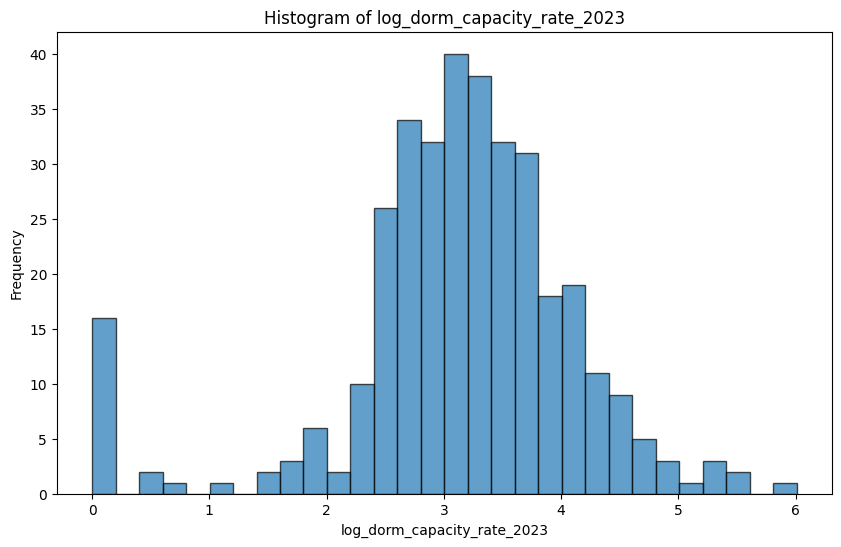

'log_dorm_capacity_rate_2023' column outliers:
           university_name  log_dorm_capacity_rate_2023
50                 경인여자대학교                     0.095310
56                 계원예술대학교                     0.000000
63                 광양보건대학교                     0.000000
122                  대림대학교                     0.470004
135                동남보건대학교                     0.000000
146                동양미래대학교                     1.131402
164                배화여자대학교                     0.000000
182                삼육보건대학교                     0.000000
207                  서일대학교                     0.000000
228                수원과학대학교                     0.000000
230                수원여자대학교                     0.000000
237                숭의여자대학교                     0.000000
242                 신안산대학교                     0.000000
270                예원예술대학교                     0.000000
287                  유한대학교                     0.000000
292                  인덕대학교                     0.641854
3

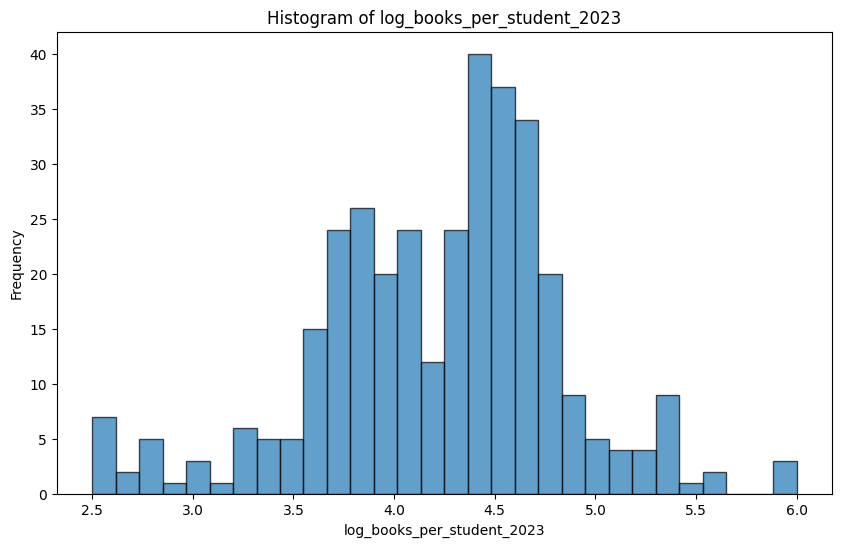

'log_books_per_student_2023' column outliers:
          university_name  log_books_per_student_2023
94                  금강대학교                    6.000000
238                신경주대학교                    6.000000
281               웅지세무대학교                    2.500000
377             한국전통문화대학교                    5.894403
381    한국폴리텍 I 대학 서울정수캠퍼스                    2.500000
385     한국폴리텍 II 대학 인천캠퍼스                    2.500000
390     한국폴리텍 IV 대학 대전캠퍼스                    2.500000
398      한국폴리텍 V 대학 전북캠퍼스                    2.500000
407    한국폴리텍 VII 대학 창원캠퍼스                    2.602690
410  한국폴리텍 특성화대학 반도체융합캠퍼스                    2.500000



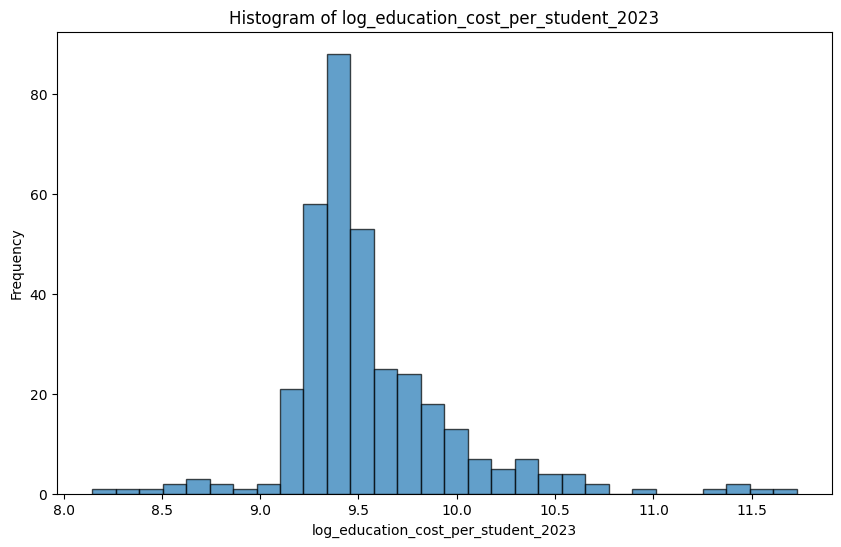

'log_education_cost_per_student_2023' column outliers:
          university_name  log_education_cost_per_student_2023
0                ICT폴리텍대학                            10.324724
18                강원도립대학교                            10.408204
57                  고려대학교                            10.376247
66                광주과학기술원                            11.457858
94                  금강대학교                            10.409627
104                 농협대학교                            10.423022
109             대구경북과학기술원                            11.553353
196                 서울대학교                            10.968883
214                성균관대학교                            10.314607
255                 연세대학교                            10.595236
261               영남외국어대학                             8.706606
270               예원예술대학교                             8.671115
278               울산과학기술원                            11.258639
332               차의과학대학교                            10.517121


In [ ]:
# 수치형 데이터 컬럼 선택
numerical_columns = univ_df.select_dtypes(include=['number']).columns

# 각 수치형 데이터에 대해 히스토그램 그리기 및 이상치 계산
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(univ_df[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # 이상치 계산
    Q1 = univ_df[column].quantile(0.25)
    Q3 = univ_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = univ_df[(univ_df[column] < lower_bound) | (univ_df[column] > upper_bound)]

    print(f"'{column}' column outliers:")
    if not outliers.empty:
        print(outliers[['university_name', column]])
    else:
        print("No outliers found.")
    print()

In [ ]:
# 'No' 열을 제외한 수치형 열 목록 선택
columns_to_center = [col for col in univ_df.select_dtypes(include=[np.number]).columns if col != 'No']

# 각 열에 대해 평균 중심화 수행
for column in columns_to_center:
    column_mean = univ_df[column].mean()
    univ_df[column] = univ_df[column] - column_mean

## Categorical Data의 전처리

In [ ]:
for column in univ_df.select_dtypes(include=['object', 'category']).columns:
    unique_values = univ_df[column].unique()
    unique_count = len(unique_values)
    print(f"'{column}' column has {unique_count} unique values.")
    print(f"Unique values: {unique_values[:20]}")
    if unique_count > 20:
        print(f"... and {unique_count - 20} more")
    print()

'university_name' column has 348 unique values.
Unique values: ['ICT폴리텍대학' '가야대학교(김해)' '가천대학교' '가톨릭관동대학교' '가톨릭꽃동네대학교' '가톨릭대학교' '가톨릭상지대학교'
 '강남대학교' '강동대학교' '강릉영동대학교' '강서대학교' '강원대학교' '강원도립대학교' '거제대학교' '건국대학교'
 '건국대학교(글로컬)' '건양대학교' '경기과학기술대학교' '경기대학교' '경남대학교']
... and 328 more

'campus_name' column has 2 unique values.
Unique values: ['본교' '분교']

'school_type' column has 2 unique values.
Unique values: ['전문대학' '대학']

'school_category' column has 6 unique values.
Unique values: ['기능대학' '대학교' '전문대학' '교육대학' '산업대학' '각종학교(대학)']

'establishment_type' column has 6 unique values.
Unique values: ['사립' '국립' '공립' '특별법법인' '국립대법인' '특별법국립']

'region_name' column has 17 unique values.
Unique values: ['경기' '경남' '강원' '충북' '경북' '서울' '충남' '부산' '대구' '인천' '세종' '광주' '전남' '전북'
 '대전' '울산' '제주']



In [ ]:
# campus_name 변경
univ_df['campus_name'] = univ_df['campus_name'].replace(['제2캠퍼스', '제3캠퍼스', '제4캠퍼스'], '제2~4캠퍼스')

# region_name 변경
def categorize_region(region):
    if region in ['경기', '인천']:
        return '수도권'
    elif region == '서울':
        return '서울'
    else:
        return '비수도권'

univ_df['region_name'] = univ_df['region_name'].apply(categorize_region)

In [ ]:
for column in univ_df.select_dtypes(include=['object', 'category']).columns:
    unique_values = univ_df[column].unique()
    unique_count = len(unique_values)
    print(f"'{column}' column has {unique_count} unique values.")
    print(f"Unique values: {unique_values[:20]}")
    if unique_count > 20:
        print(f"... and {unique_count - 20} more")
    print()

'university_name' column has 348 unique values.
Unique values: ['ICT폴리텍대학' '가야대학교(김해)' '가천대학교' '가톨릭관동대학교' '가톨릭꽃동네대학교' '가톨릭대학교' '가톨릭상지대학교'
 '강남대학교' '강동대학교' '강릉영동대학교' '강서대학교' '강원대학교' '강원도립대학교' '거제대학교' '건국대학교'
 '건국대학교(글로컬)' '건양대학교' '경기과학기술대학교' '경기대학교' '경남대학교']
... and 328 more

'campus_name' column has 2 unique values.
Unique values: ['본교' '분교']

'school_type' column has 2 unique values.
Unique values: ['전문대학' '대학']

'school_category' column has 6 unique values.
Unique values: ['기능대학' '대학교' '전문대학' '교육대학' '산업대학' '각종학교(대학)']

'establishment_type' column has 6 unique values.
Unique values: ['사립' '국립' '공립' '특별법법인' '국립대법인' '특별법국립']

'region_name' column has 3 unique values.
Unique values: ['수도권' '비수도권' '서울']



In [ ]:
# 각 열의 고유 값 및 빈도수 출력
for column in ['school_category', 'establishment_type']:
    value_counts = univ_df[column].value_counts()
    print(f"'{column}' column value counts:")
    print(value_counts)
    print()

'school_category' column value counts:
school_category
대학교         177
전문대학        131
기능대학         28
교육대학          9
산업대학          2
각종학교(대학)      1
Name: count, dtype: int64

'establishment_type' column value counts:
establishment_type
사립       297
국립        35
공립         8
특별법법인      4
국립대법인      2
특별법국립      2
Name: count, dtype: int64



In [ ]:
# 'school_category'가 특정 값에 해당하는 대학명 출력
school_categories = ['교육대학', '산업대학', '기능대학', '각종학교(대학)']
filtered_by_school_category = univ_df[univ_df['school_category'].isin(school_categories)]
print("Universities with specific school categories:")
print(filtered_by_school_category[['university_name', 'school_category']])
print()

# 'establishment_type'이 특정 값에 해당하는 대학명 출력
establishment_types = ['공립', '특별법법인', '국립대법인', '특별법국립']
filtered_by_establishment_type = univ_df[univ_df['establishment_type'].isin(establishment_types)]
print("Universities with specific establishment types:")
print(filtered_by_establishment_type[['university_name', 'establishment_type']])
print()

Universities with specific school categories:
           university_name school_category
0                 ICT폴리텍대학            기능대학
61                 공주교육대학교            교육대학
67                 광주교육대학교            교육대학
112                대구교육대학교            교육대학
171                부산교육대학교            교육대학
194                서울교육대학교            교육대학
311                전주교육대학교            교육대학
329                진주교육대학교            교육대학
338                  청운대학교            산업대학
339                청주교육대학교            교육대학
344                춘천교육대학교            교육대학
375               한국예술종합학교        각종학교(대학)
380     한국폴리텍 I 대학 서울강서캠퍼스            기능대학
381     한국폴리텍 I 대학 서울정수캠퍼스            기능대학
382       한국폴리텍 I 대학 성남캠퍼스            기능대학
383       한국폴리텍 I 대학 제주캠퍼스            기능대학
384     한국폴리텍 II 대학 남인천캠퍼스            기능대학
385      한국폴리텍 II 대학 인천캠퍼스            기능대학
387     한국폴리텍 III 대학 강릉캠퍼스            기능대학
388     한국폴리텍 III 대학 원주캠퍼스            기능대학
389     한국폴리텍 III 대학 춘천캠퍼스            기능대학
390     

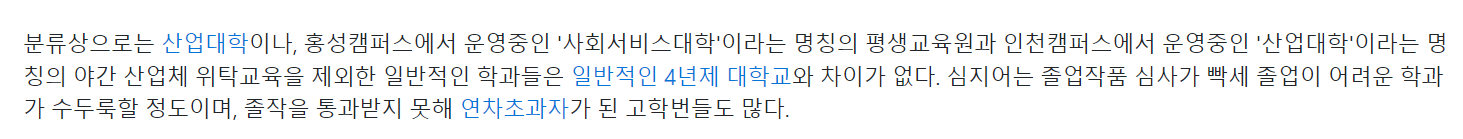

In [ ]:
# 'school_category'가 '산업대학'인 것을 '대학교'로 변경
univ_df['school_category'] = univ_df['school_category'].replace('산업대학', '대학교')

# 'establishment_type'이 '공립', '국립', '국립대법인'인 것을 '국공립'으로 변경
univ_df['establishment_type'] = univ_df['establishment_type'].replace(['공립', '국립', '국립대법인'], '국공립')

# 'establishment_type'이 '특별법국립'인 행을 제외
univ_df = univ_df[univ_df['establishment_type'] != '특별법국립']

In [ ]:
for column in univ_df.select_dtypes(include=['object', 'category']).columns:
    unique_values = univ_df[column].unique()
    unique_count = len(unique_values)
    print(f"'{column}' column has {unique_count} unique values.")
    print(f"Unique values: {unique_values[:20]}")
    if unique_count > 20:
        print(f"... and {unique_count - 20} more")
    print()

'university_name' column has 346 unique values.
Unique values: ['ICT폴리텍대학' '가야대학교(김해)' '가천대학교' '가톨릭관동대학교' '가톨릭꽃동네대학교' '가톨릭대학교' '가톨릭상지대학교'
 '강남대학교' '강동대학교' '강릉영동대학교' '강서대학교' '강원대학교' '강원도립대학교' '거제대학교' '건국대학교'
 '건국대학교(글로컬)' '건양대학교' '경기과학기술대학교' '경기대학교' '경남대학교']
... and 326 more

'campus_name' column has 2 unique values.
Unique values: ['본교' '분교']

'school_type' column has 2 unique values.
Unique values: ['전문대학' '대학']

'school_category' column has 4 unique values.
Unique values: ['기능대학' '대학교' '전문대학' '교육대학']

'establishment_type' column has 3 unique values.
Unique values: ['사립' '국공립' '특별법법인']

'region_name' column has 3 unique values.
Unique values: ['수도권' '비수도권' '서울']



In [ ]:
# 원-핫 인코딩할 열 목록과 기준 변수 설정
columns_to_encode = {
    'campus_name': '본교',
    'school_type': '대학',
    'school_category': '대학교',
    'establishment_type': '사립',
    'region_name': '서울'
}

# 각 열에 대해 원-핫 인코딩 수행 (기준 변수를 설정하여 drop_first=False 옵션 사용)
univ_df_encoded = pd.get_dummies(univ_df, columns=columns_to_encode.keys(), drop_first=False)

# 기준 변수 제거
for column, base_value in columns_to_encode.items():
    base_column = f"{column}_{base_value}"
    if base_column in univ_df_encoded.columns:
        univ_df_encoded.drop(columns=base_column, inplace=True)

# True/False를 1과 0으로 변환
univ_df_encoded = univ_df_encoded.applymap(lambda x: 1 if x == True else (0 if x == False else x))

# 변경할 열 이름 매핑
column_name_mapping = {
    'campus_name_분교': 'campus_name_branch',
    'school_type_전문대학': 'school_type_junior_college',
    'school_category_기능대학': 'school_category_technical_college',
    'school_category_전문대학': 'school_category_junior_college',
    'school_category_교육대학': 'school_category_education_college',
    'establishment_type_특별법법인': 'establishment_type_special_corporation',
    'establishment_type_국공립': 'establishment_type_national_government',
    'region_name_수도권': 'region_name_capital_area',
    'region_name_비수도권': 'region_name_not_capital_area'
}

# 열 이름 변경
univ_df_encoded.rename(columns=column_name_mapping, inplace=True)

In [ ]:
univ_df_encoded.columns

Index(['No', 'university_name', 'freshman_enrollment_rate_2023',
       'employment_rate_2023', 'faculty_teaching_ratio_2023',
       'scholarship_per_student_2023', 'annual_tuition_2024',
       'log_undergrad_admission_quota_2023', 'log_undergrad_graduates_2023',
       'log_full_time_faculty_2023', 'log_undergrad_students_2023',
       'log_freshman_competition_rate_2023', 'log_international_students_2023',
       'log_students_per_faculty_2023',
       'log_faculty_ratio_based_on_quota_2023',
       'log_faculty_ratio_based_on_enrollment_2023',
       'log_dorm_capacity_rate_2023', 'log_books_per_student_2023',
       'log_education_cost_per_student_2023', 'campus_name_branch',
       'school_type_junior_college', 'school_category_education_college',
       'school_category_technical_college', 'school_category_junior_college',
       'establishment_type_national_government',
       'establishment_type_special_corporation',
       'region_name_not_capital_area', 'region_name_capital

In [ ]:
univ_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 346 entries, 0 to 441
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   No                                          346 non-null    int64  
 1   university_name                             346 non-null    object 
 2   freshman_enrollment_rate_2023               346 non-null    float64
 3   employment_rate_2023                        346 non-null    float64
 4   faculty_teaching_ratio_2023                 346 non-null    float64
 5   scholarship_per_student_2023                346 non-null    float64
 6   annual_tuition_2024                         346 non-null    float64
 7   log_undergrad_admission_quota_2023          346 non-null    float64
 8   log_undergrad_graduates_2023                346 non-null    float64
 9   log_full_time_faculty_2023                  346 non-null    float64
 10  log_undergrad_stude

In [ ]:
univ_df_encoded.drop('school_type_junior_college', axis = 1, inplace = True)

In [ ]:
univ_df_encoded.to_excel("대학주요정보_전처리.xlsx")

In [ ]:
univ_df_encoded.columns

Index(['No', 'university_name', 'freshman_enrollment_rate_2023',
       'employment_rate_2023', 'faculty_teaching_ratio_2023',
       'scholarship_per_student_2023', 'annual_tuition_2024',
       'log_undergrad_admission_quota_2023', 'log_undergrad_graduates_2023',
       'log_full_time_faculty_2023', 'log_undergrad_students_2023',
       'log_freshman_competition_rate_2023', 'log_international_students_2023',
       'log_students_per_faculty_2023',
       'log_faculty_ratio_based_on_quota_2023',
       'log_faculty_ratio_based_on_enrollment_2023',
       'log_dorm_capacity_rate_2023', 'log_books_per_student_2023',
       'log_education_cost_per_student_2023', 'campus_name_branch',
       'school_category_education_college',
       'school_category_technical_college', 'school_category_junior_college',
       'establishment_type_national_government',
       'establishment_type_special_corporation',
       'region_name_not_capital_area', 'region_name_capital_area'],
      dtype='object')

## 모델 해석

In [ ]:
import pandas as pd

univ_df_encoded = pd.read_excel("대학주요정보_전처리.xlsx")

### 전체 변수를 포함한 모델

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# 종속 변수 (y)와 독립 변수 (X) 설정
y = univ_df_encoded['freshman_enrollment_rate_2023']
X = univ_df_encoded.drop(columns=['freshman_enrollment_rate_2023', 'No', 'university_name'])

# 상수항 추가 (statsmodels는 상수항을 별도로 추가해야 함)
X = sm.add_constant(X)

# 다중 선형 회귀 모델 생성 및 학습
model = sm.OLS(y, X).fit()

# 모델 요약 출력
print(model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     freshman_enrollment_rate_2023   R-squared:                       0.692
Model:                                       OLS   Adj. R-squared:                  0.669
Method:                            Least Squares   F-statistic:                     30.11
Date:                           Thu, 11 Jul 2024   Prob (F-statistic):           8.22e-68
Time:                                   16:50:31   Log-Likelihood:                -1208.9
No. Observations:                            346   AIC:                             2468.
Df Residuals:                                321   BIC:                             2564.
Df Model:                                     24                                         
Covariance Type:                       nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025  

### 변수 한 개씩 포함한 모델

In [ ]:
# 종속 변수 (y) 설정
y = univ_df_encoded['freshman_enrollment_rate_2023']

# 독립 변수 목록 설정
independent_variables = univ_df_encoded.drop(columns=['freshman_enrollment_rate_2023', 'No', 'university_name']).columns

# 각 독립 변수에 대해 회귀 모델 학습 및 결과 출력
for var in independent_variables:
    X = univ_df_encoded[[var]]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(f"Results for {var}:")
    print(model.summary())
    print("\n" + "="*80 + "\n")

Results for employment_rate_2023:
                                  OLS Regression Results                                 
Dep. Variable:     freshman_enrollment_rate_2023   R-squared:                       0.003
Model:                                       OLS   Adj. R-squared:                  0.000
Method:                            Least Squares   F-statistic:                     1.018
Date:                           Thu, 11 Jul 2024   Prob (F-statistic):              0.314
Time:                                   16:27:39   Log-Likelihood:                -1412.3
No. Observations:                            346   AIC:                             2829.
Df Residuals:                                344   BIC:                             2836.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                           coef    std err          t      P>|t|  

**유의하지 않은 변수:**

취업률, 전임교원 강의 담당 비율, 분교 여부

**유의한 변수:**

(+) 1인당 장학금, 연평균 등록금, 입학정원, 졸업생수, 전임교원수, 재학생수, 신입생 경쟁률, 외국인 학생 수, 전임교원 확보율 (학생 정원 기준), 1인당 도서 자료 수, 1인당 교육비, 국공립 여부, 특별법법인 여부

(-) 전임 교원 확보율 (재학생 기준), 기숙사 수용율, 기능대학 여부, 전문대 여부, 비수도권 여부, 수도권 여부

### 변수 의미 정리해보기

본분교 여부

학교 종류: 일반대, 기능대 (폴리텍), 전문대, 교대

설립 종류: 사립, 국공립, 특별법법인 (IST)

위치:  서울, 수도권, 비수도권

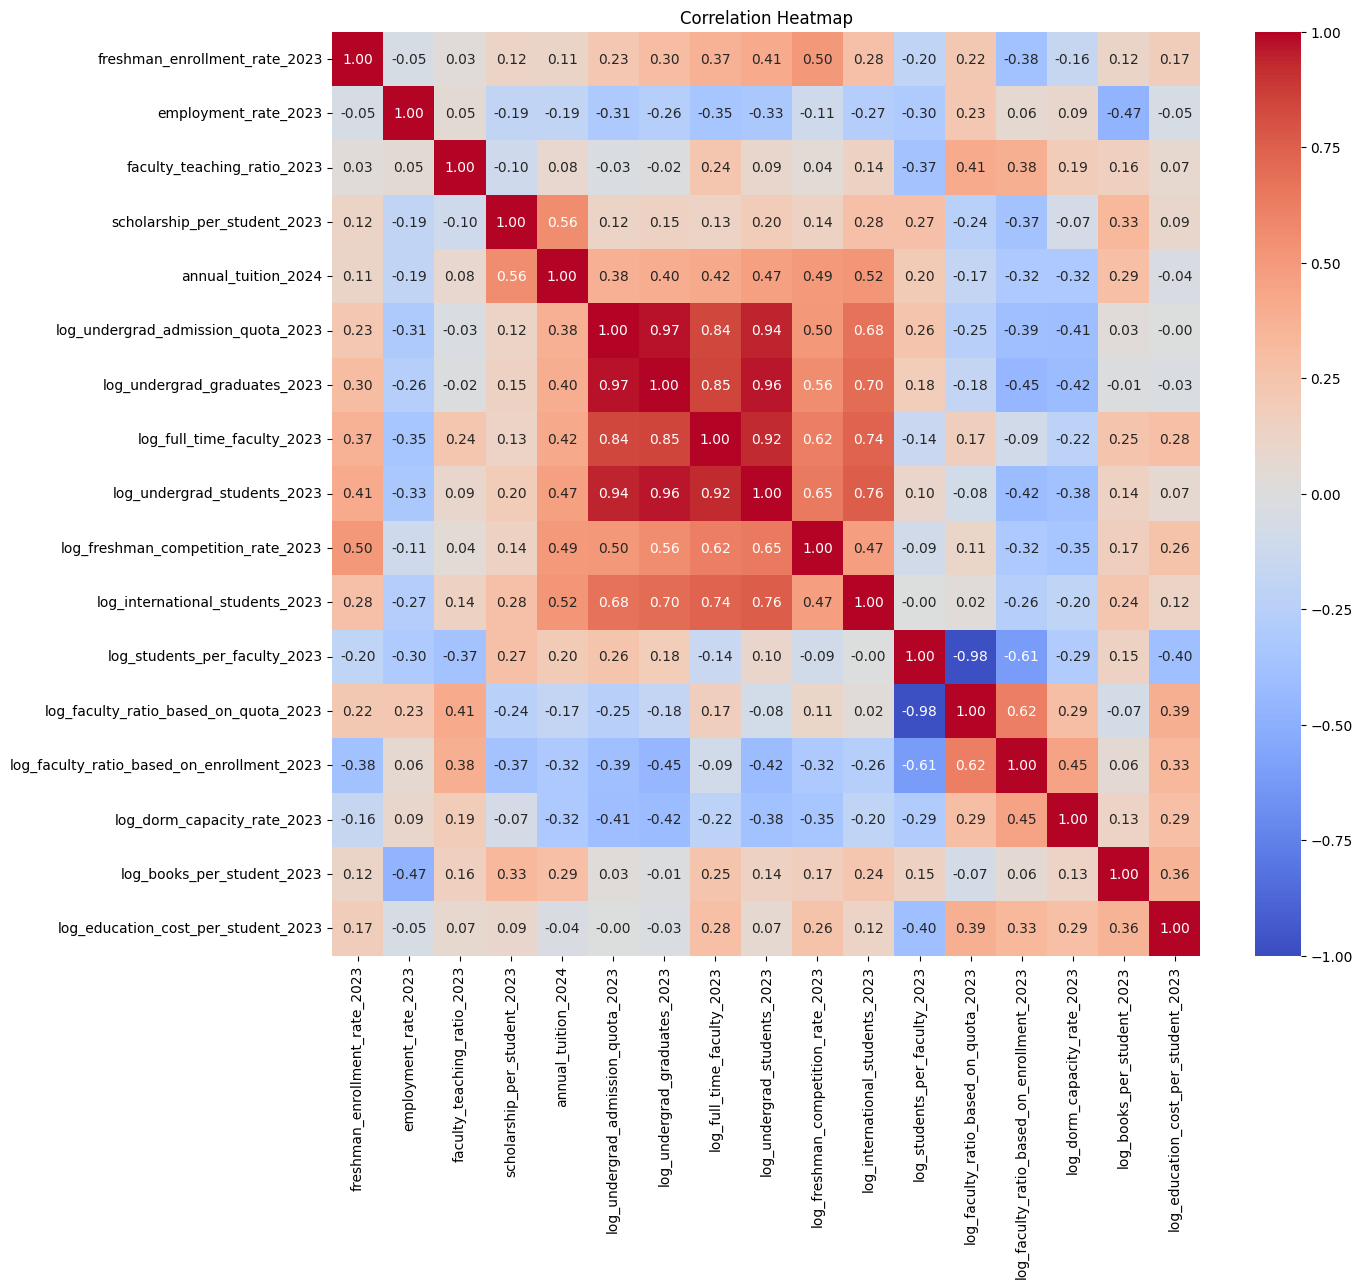

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 분석할 열 목록
columns_to_analyze = [
    'freshman_enrollment_rate_2023', 'employment_rate_2023', 'faculty_teaching_ratio_2023',
    'scholarship_per_student_2023', 'annual_tuition_2024', 'log_undergrad_admission_quota_2023',
    'log_undergrad_graduates_2023', 'log_full_time_faculty_2023', 'log_undergrad_students_2023',
    'log_freshman_competition_rate_2023', 'log_international_students_2023',
    'log_students_per_faculty_2023', 'log_faculty_ratio_based_on_quota_2023',
    'log_faculty_ratio_based_on_enrollment_2023', 'log_dorm_capacity_rate_2023',
    'log_books_per_student_2023', 'log_education_cost_per_student_2023'
]

# 상관관계 계산
corr_matrix = univ_df_encoded[columns_to_analyze].corr()

# 히트맵 그리기
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

입학정원, 졸업생수, 전임교원수, 재학생수는 사실상 학교 규모에 대한 변수임. 외국인 학생 수도 비슷함.

**=> 입학정원만 갖고 분석하기.**

전임교원 1인당 학생 수(학생정원기준)와 전임교원 확보율(학생정원기준)은 사실 상 같은 변수임. 그리고 전임 교원 확보율(재학생 기준)과 전임 교원 확보율(학생정원기준)은 성격이 유사함.

**=> 전임교원 1인당 학생 수(학생정원기준)만 갖고 분석하기.**

### 유사한 변수를 처리한 모든 변수 포함한 모델

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# 종속 변수 (y)와 독립 변수 (X) 설정
y = univ_df_encoded['freshman_enrollment_rate_2023']
X = univ_df_encoded.drop(columns=['freshman_enrollment_rate_2023', 'No', 'university_name',
                                  'log_undergrad_graduates_2023', 'log_full_time_faculty_2023', 'log_undergrad_students_2023','log_international_students_2023',
                                  'log_faculty_ratio_based_on_quota_2023','log_faculty_ratio_based_on_enrollment_2023'])

# 상수항 추가 (statsmodels는 상수항을 별도로 추가해야 함)
X = sm.add_constant(X)

# 다중 선형 회귀 모델 생성 및 학습
model = sm.OLS(y, X).fit()

# 모델 요약 출력
print(model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     freshman_enrollment_rate_2023   R-squared:                       0.403
Model:                                       OLS   Adj. R-squared:                  0.370
Method:                            Least Squares   F-statistic:                     12.27
Date:                           Thu, 11 Jul 2024   Prob (F-statistic):           2.65e-27
Time:                                   16:54:32   Log-Likelihood:                -1323.5
No. Observations:                            346   AIC:                             2685.
Df Residuals:                                327   BIC:                             2758.
Df Model:                                     18                                         
Covariance Type:                       nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      

사용한 변수

- 본분교 여부
- 학교 종류
- 설립 종류
- 위치
- 취업률
- 전임교원 강의 담당 비율
- 학생 1인당 연간 장학금
- 연평균 등록금
- 신입생 경쟁률
- 입학 정원
- 전임교원 1인당 학생 수
- 기숙사 수용률
- 학생 1인당 도서 자료 수
- 학생 1인당 교육비

다른 모든 변수가 같을 때, 장학금이 늘어날수록 충원율이 올라간다.

다른 모든 변수가 같을 때, 신입생 경쟁률이 증가할수록 충원율이 올라간다.

다른 모든 변수가 같을 때, 전임교원 1인당 학생 수가 증가할수록 충원율이 감소한다.

다른 모든 변수가 같을 때, 기숙사 수용률이 증가할수록 충원율이 감소한다.

다른 모든 변수가 같을 때, 일반대보다 교대의 충원율이 높다.

다른 모든 변수가 같을 때, 일반대보다 전문대의 충원율이 낮다.






### 본분교 여부, 학교 종류, 설립 종류, 위치를 고정한 모델

In [ ]:
# 종속 변수 (y) 설정
y = univ_df_encoded['freshman_enrollment_rate_2023']

# 고정 효과로 사용할 변수들
fixed_effects = ['campus_name_branch', 'school_category_education_college', 'school_category_technical_college',
                 'school_category_junior_college', 'establishment_type_national_government',
                 'establishment_type_special_corporation', 'region_name_not_capital_area',
                 'region_name_capital_area']

# 고정 효과 변수들을 포함한 독립 변수 (X_fixed) 설정
X_fixed = univ_df_encoded[fixed_effects]

# 나머지 변수들 설정
variables_to_analyze = [
    'employment_rate_2023', 'faculty_teaching_ratio_2023', 'scholarship_per_student_2023',
    'annual_tuition_2024', 'log_undergrad_admission_quota_2023', 'log_freshman_competition_rate_2023',
    'log_students_per_faculty_2023', 'log_dorm_capacity_rate_2023', 'log_books_per_student_2023',
    'log_education_cost_per_student_2023'
]

# 각 변수에 대해 회귀 분석 수행 및 결과 출력
for var in variables_to_analyze:
    X = pd.concat([X_fixed, univ_df_encoded[[var]]], axis=1)
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(f"Results for {var} with fixed effects:")
    print(model.summary())
    print("\n" + "="*80 + "\n")

Results for employment_rate_2023 with fixed effects:
                                  OLS Regression Results                                 
Dep. Variable:     freshman_enrollment_rate_2023   R-squared:                       0.164
Model:                                       OLS   Adj. R-squared:                  0.142
Method:                            Least Squares   F-statistic:                     7.349
Date:                           Thu, 11 Jul 2024   Prob (F-statistic):           8.61e-10
Time:                                   17:07:01   Log-Likelihood:                -1381.7
No. Observations:                            346   AIC:                             2783.
Df Residuals:                                336   BIC:                             2822.
Df Model:                                      9                                         
Covariance Type:                       nonrobust                                         
                                             co

본분교 여부, 학교 종류, 설립 종류, 위치를 고정했을 때

- 취업률이 높을 수록 충원율이 높다.
- 장학금이 많을 수록 충원율이 높다.
- 입학정원이 많을 수록 충원율이 높다.
- 경쟁률이 높을 수록 충원율이 높다.
- 전임교원 1인당 학생 수가 높을 수록 충원율이 낮다.
- 기숙사 수용율이 높을수록 충원율이 낮다.
- 학생 1인당 도서 자료 수가 높을 수록 충원율이 낮다.(?)

### 일반대학 중 본분교 여부, 설립 종류, 위치를 고정한 모델

In [ ]:
univ_df_only_univ = univ_df_encoded[(univ_df_encoded['school_category_education_college'] == 0) & (univ_df_encoded['school_category_technical_college'] == 0) & (univ_df_encoded['school_category_junior_college'] == 0)]

In [ ]:
# 종속 변수 (y) 설정
y = univ_df_only_univ['freshman_enrollment_rate_2023']

# 고정 효과로 사용할 변수들
fixed_effects = ['campus_name_branch', 'establishment_type_national_government',
                 'establishment_type_special_corporation', 'region_name_not_capital_area',
                 'region_name_capital_area']

# 고정 효과 변수들을 포함한 독립 변수 (X_fixed) 설정
X_fixed = univ_df_only_univ[fixed_effects]

# 나머지 변수들 설정
variables_to_analyze = [
    'employment_rate_2023', 'faculty_teaching_ratio_2023', 'scholarship_per_student_2023',
    'annual_tuition_2024', 'log_undergrad_admission_quota_2023', 'log_freshman_competition_rate_2023',
    'log_students_per_faculty_2023', 'log_dorm_capacity_rate_2023', 'log_books_per_student_2023',
    'log_education_cost_per_student_2023'
]

# 각 변수에 대해 회귀 분석 수행 및 결과 출력
for var in variables_to_analyze:
    X = pd.concat([X_fixed, univ_df_only_univ[[var]]], axis=1)
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(f"Results for {var} with fixed effects:")
    print(model.summary())
    print("\n" + "="*80 + "\n")

Results for employment_rate_2023 with fixed effects:
                                  OLS Regression Results                                 
Dep. Variable:     freshman_enrollment_rate_2023   R-squared:                       0.110
Model:                                       OLS   Adj. R-squared:                  0.079
Method:                            Least Squares   F-statistic:                     3.517
Date:                           Thu, 11 Jul 2024   Prob (F-statistic):            0.00263
Time:                                   17:19:37   Log-Likelihood:                -695.40
No. Observations:                            178   AIC:                             1405.
Df Residuals:                                171   BIC:                             1427.
Df Model:                                      6                                         
Covariance Type:                       nonrobust                                         
                                             co

일반대학에서는 본분교 여부, 설립 종류, 위치를 고정했을 때

- 취업률이 높다고 충원율이 높은 것이 아니다.
- 전임교원 강의 담당 비율이 높을수록 충원율이 높다.
- 장학금이 많다고 충원율이 높은 것이 아니다.
- 입학정원이 많을 수록 충원율이 높다.
- 경쟁률이 높을 수록 충원율이 높다.
- 전임교원 1인당 학생 수가 높을 수록 충원율이 낮다.
- 기숙사 수용율이 높을수록 충원율이 낮다.
- 학생 1인당 도서 자료 수가 높을 수록 충원율이 낮다. (?)

In [ ]:
# 종속 변수 (y) 설정
y = univ_df_only_univ['freshman_enrollment_rate_2023']

# 고정 효과로 사용할 변수들
fixed_effects = ['campus_name_branch', 'establishment_type_national_government',
                 'establishment_type_special_corporation', 'region_name_not_capital_area',
                 'region_name_capital_area']

# 고정 효과 변수들을 포함한 독립 변수 (X_fixed) 설정
X_fixed = univ_df_only_univ[fixed_effects]

# 'log_books_per_student_2023' 변수의 이상치 제거
Q1 = univ_df_only_univ['log_books_per_student_2023'].quantile(0.25)
Q3 = univ_df_only_univ['log_books_per_student_2023'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 기준 설정 (IQR 범위 밖의 값들 제거)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거
df_filtered = univ_df_only_univ[(univ_df_only_univ['log_books_per_student_2023'] >= lower_bound) &
                                (univ_df_only_univ['log_books_per_student_2023'] <= upper_bound)]

# 종속 변수 (y) 및 고정 효과 포함 독립 변수 (X_fixed) 설정
y_filtered = df_filtered['freshman_enrollment_rate_2023']
X_fixed_filtered = df_filtered[fixed_effects]

# 'log_books_per_student_2023' 변수에 대해 회귀 분석 수행
var = 'log_books_per_student_2023'
X = pd.concat([X_fixed_filtered, df_filtered[[var]]], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y_filtered, X).fit()
print(f"Results for {var} with fixed effects after removing outliers:")
print(model.summary())
print("\n" + "="*80 + "\n")

Results for log_books_per_student_2023 with fixed effects after removing outliers:
                                  OLS Regression Results                                 
Dep. Variable:     freshman_enrollment_rate_2023   R-squared:                       0.137
Model:                                       OLS   Adj. R-squared:                  0.104
Method:                            Least Squares   F-statistic:                     4.089
Date:                           Thu, 11 Jul 2024   Prob (F-statistic):           0.000777
Time:                                   17:26:33   Log-Likelihood:                -594.81
No. Observations:                            161   AIC:                             1204.
Df Residuals:                                154   BIC:                             1225.
Df Model:                                      6                                         
Covariance Type:                       nonrobust                                         
                 

이상치를 제거하니 충원율에 유의하지 않았다.

### 일반대학 중 위치에 대한 조절효과

In [ ]:
univ_df_only_univ.columns

Index(['No', 'university_name', 'freshman_enrollment_rate_2023',
       'employment_rate_2023', 'faculty_teaching_ratio_2023',
       'scholarship_per_student_2023', 'annual_tuition_2024',
       'log_undergrad_admission_quota_2023', 'log_undergrad_graduates_2023',
       'log_full_time_faculty_2023', 'log_undergrad_students_2023',
       'log_freshman_competition_rate_2023', 'log_international_students_2023',
       'log_students_per_faculty_2023',
       'log_faculty_ratio_based_on_quota_2023',
       'log_faculty_ratio_based_on_enrollment_2023',
       'log_dorm_capacity_rate_2023', 'log_books_per_student_2023',
       'log_education_cost_per_student_2023', 'campus_name_branch',
       'school_category_education_college',
       'school_category_technical_college', 'school_category_junior_college',
       'establishment_type_national_government',
       'establishment_type_special_corporation',
       'region_name_not_capital_area', 'region_name_capital_area'],
      dtype='object')

In [ ]:
import statsmodels.formula.api as smf

# 종속변수와 독립변수 및 조절변수를 지정합니다.
dependent_var = 'freshman_enrollment_rate_2023'
independent_vars = [
    'employment_rate_2023', 'faculty_teaching_ratio_2023', 'scholarship_per_student_2023',
    'annual_tuition_2024', 'log_undergrad_admission_quota_2023', 'log_freshman_competition_rate_2023',
    'log_students_per_faculty_2023', 'log_dorm_capacity_rate_2023', 'log_books_per_student_2023',
    'log_education_cost_per_student_2023'
]

# 원핫 인코딩된 변수들을 조절변수로 사용합니다.
moderator_vars = ['region_name_not_capital_area', 'region_name_capital_area']

# 각 독립변수에 대해 조절변수를 포함한 회귀모델을 개별적으로 작성하고 결과를 출력합니다.
results = {}
for var in independent_vars:
    formula = f'{dependent_var} ~ {var} + {" + ".join(moderator_vars)} + {var}:region_name_not_capital_area + {var}:region_name_capital_area'
    model = smf.ols(formula=formula, data=univ_df_only_univ).fit()
    results[var] = model.summary()
    print(f'Results for {var}:\n', model.summary(), '\n')


Results for employment_rate_2023:
                                   OLS Regression Results                                 
Dep. Variable:     freshman_enrollment_rate_2023   R-squared:                       0.062
Model:                                       OLS   Adj. R-squared:                  0.035
Method:                            Least Squares   F-statistic:                     2.270
Date:                           Fri, 12 Jul 2024   Prob (F-statistic):             0.0497
Time:                                   09:49:46   Log-Likelihood:                -700.06
No. Observations:                            178   AIC:                             1412.
Df Residuals:                                172   BIC:                             1431.
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
                                                        coef    s

**해석:**

일반대학 중 서울에서는 신입생 경쟁률이 충원율에 유의하지 않으나, 비수도권일수록 신입생 경쟁률이 높을수록 충원율도 높아지는 경향이 있음.

### 지역이 같은 일반 대학 중 장학금에 대한 조절효과

In [ ]:
# 종속변수와 독립변수 및 조절변수를 지정합니다.
dependent_var = 'freshman_enrollment_rate_2023'
moderator_var = 'scholarship_per_student_2023'
independent_vars = [
    'employment_rate_2023', 'faculty_teaching_ratio_2023',
    'annual_tuition_2024', 'log_undergrad_admission_quota_2023', 'log_freshman_competition_rate_2023',
    'log_students_per_faculty_2023', 'log_dorm_capacity_rate_2023', 'log_books_per_student_2023',
    'log_education_cost_per_student_2023'
]

# 고정 변수로 사용할 원핫 인코딩된 지역 변수들을 지정합니다.
fixed_vars = ['region_name_not_capital_area', 'region_name_capital_area']

# 각 독립변수에 대해 조절변수와 고정변수를 포함한 회귀모델을 개별적으로 작성하고 결과를 출력합니다.
results = {}
for var in independent_vars:
    formula = f'{dependent_var} ~ {var} * {moderator_var} + {" + ".join(fixed_vars)}'
    model = smf.ols(formula=formula, data=univ_df_only_univ).fit()
    results[var] = model.summary()
    print(f'Results for {var}:\n', model.summary(), '\n')


Results for employment_rate_2023:
                                   OLS Regression Results                                 
Dep. Variable:     freshman_enrollment_rate_2023   R-squared:                       0.110
Model:                                       OLS   Adj. R-squared:                  0.084
Method:                            Least Squares   F-statistic:                     4.257
Date:                           Fri, 12 Jul 2024   Prob (F-statistic):            0.00113
Time:                                   10:02:54   Log-Likelihood:                -695.37
No. Observations:                            178   AIC:                             1403.
Df Residuals:                                172   BIC:                             1422.
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
                                                        coef    s

**해석:**

- 같은 지역 일반대학에서, 취업률은 신입생 충원율에 유의하지 않으나 장학금을 많이 줄수록 취업률이 높을 수록 신입생 충원율이 높아지는 경향이 있다.
- 같은 지역 일반대학에서,교원 강의 담당 비율은 신입생 충원율에 유의하지 않으나 장학금을 많이 줄수록 이 비율이 높을수록 신입생 충원율이 높아지는 경향이 있다.
- 같은 지역 일반대학에서,학생 수 당 책 개수는 신입생 충원율에 유의하지 않으나 장학금을 많이 줄수록 개수가 많을수록 신입생 충원율이 낮아지는 경향이 있다. (Outlier 처리가 필요)

# **과제**

해당 데이터셋에 선형 회귀 분석을 수행하시오. 고정효과 / 조절효과를 포함하여 풍성한 분석을 시도해보시오.필요하다면 다른 전처리 방법이나 외부에서 변수를 연결 지어도 된다.

**채점 기준:**

1. 전체적으로 5개의 통계적으로 유의한 결과에 대한 해석을 했는가? (각 4점씩 20점)
2. 해석한 내용이 선형 회귀 분석의 이론에 근거하여 타당한가? (20점 만점으로 정성 평가)
3. 고정효과를 포함한 선형 회귀 모델을 구성하고, 이 모델의 결과에 대한 해석을 했는가? (10점)
4. 고정효과를 포함한 선형 회귀 모델의 경우, 해석한 내용이 고정효과 이론에 근거하여 타당한가? (20점 만점으로 정성 평가)
5. 조절효과를 포함한 선형 회귀 모델을 구성하고, 이 모델의 결과에 대한 해석을 했는가? (10점)
6. 조절효과를 포함한 선형 회귀 모델의 경우, 해석한 내용이 조절효과 이론에 근거하여 타당한가? (20점 만점으로 정성 평가)

필요하면 아래에 텍스트 셀을 나누어서 정리해도 좋다.

In [ ]:
#여기에 코드를 입력하시오.



**해석**